##Building Machine Learning Pipelines: Data Analysis Phase
In this and the upcoming videos we will focus on creating Machine Learning Pipelines considering all the life cycle of a Data Science Projects. This will be important for professionals who have not worked with huge dataset.

Project Name: House Prices: Advanced Regression Techniques
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

All the Lifecycle In A Data Science Projects
Data Analysis
Feature Engineering
Feature Selection
Model Building
Model Deployment

In [ ]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_csv('train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


In [ ]:
## print the top5 records
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In Data Analysis We will Analyze To Find out the below stuff
Missing Values
All The Numerical Variables
Distribution of the Numerical Variables
Categorical Variables
Cardinality of Categorical Variables
Outliers
Relationship between independent and dependent feature(SalePrice)

##Missing Values

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


##Since they are many missing values, we need to find the relationship between missing values and Sales Price
Let's plot some diagram for this relationship



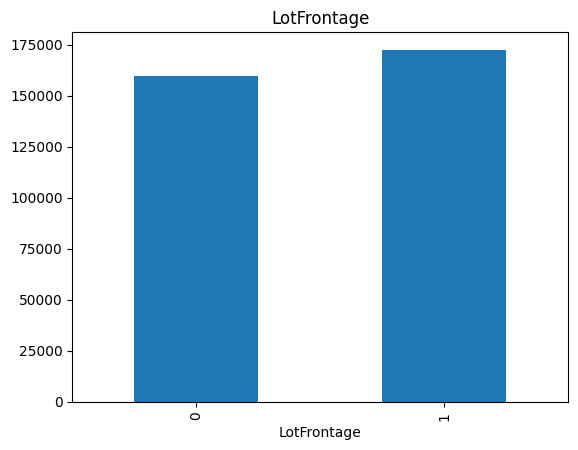

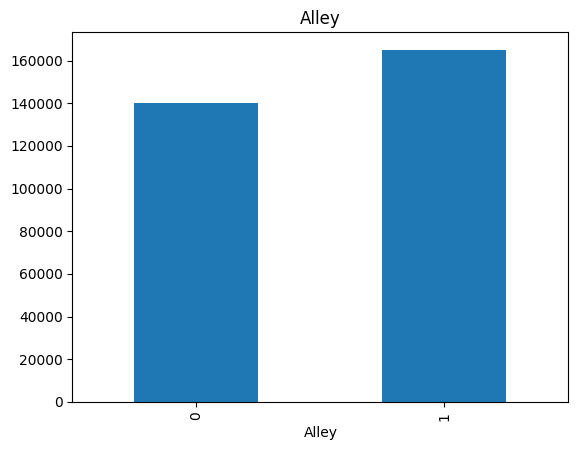

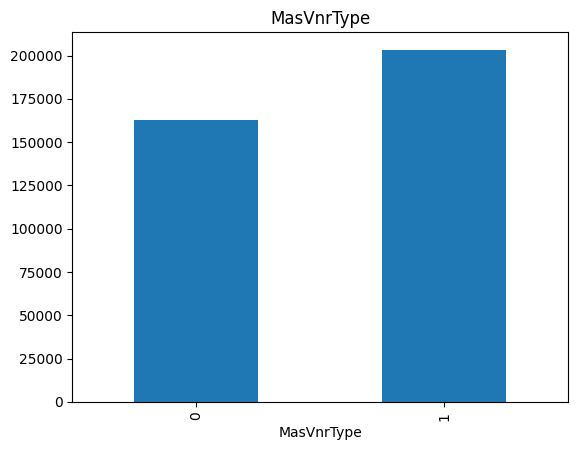

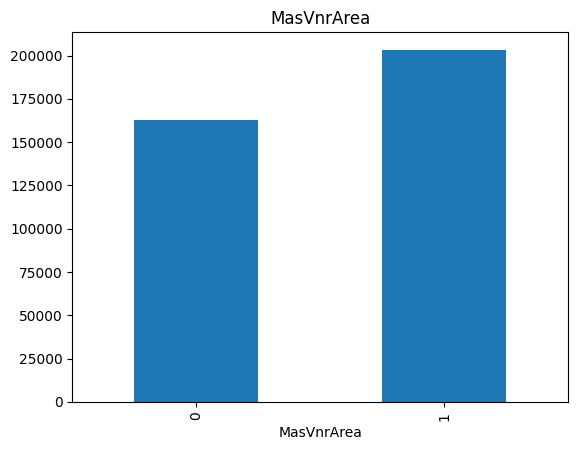

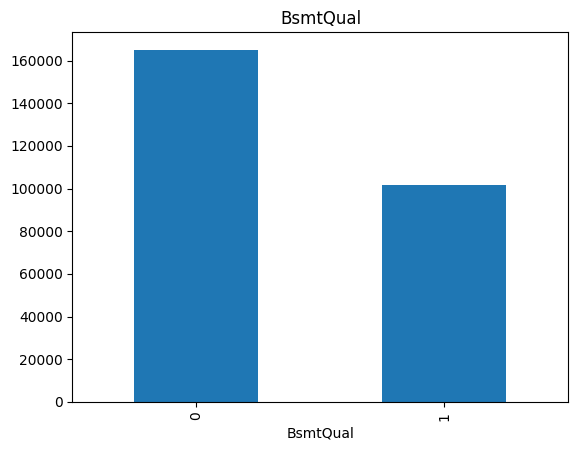

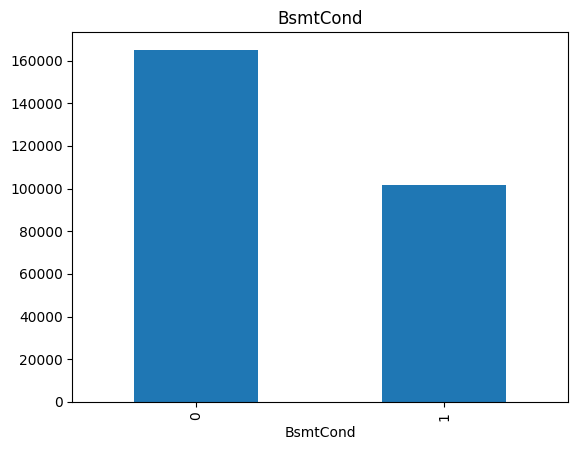

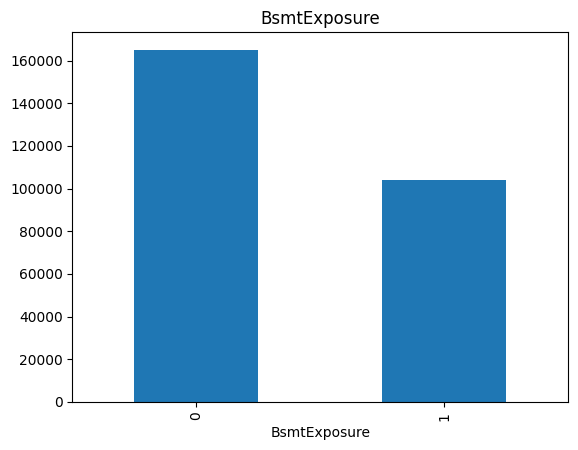

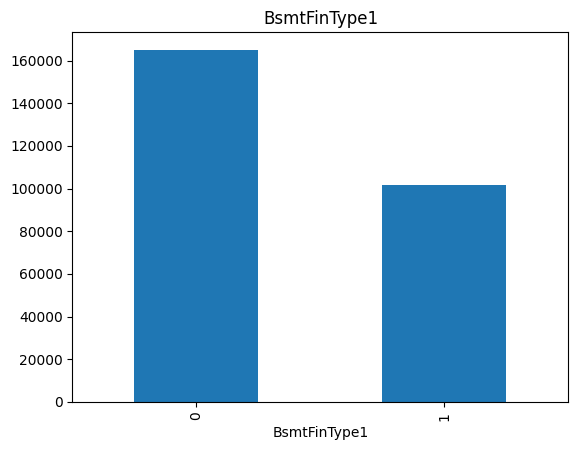

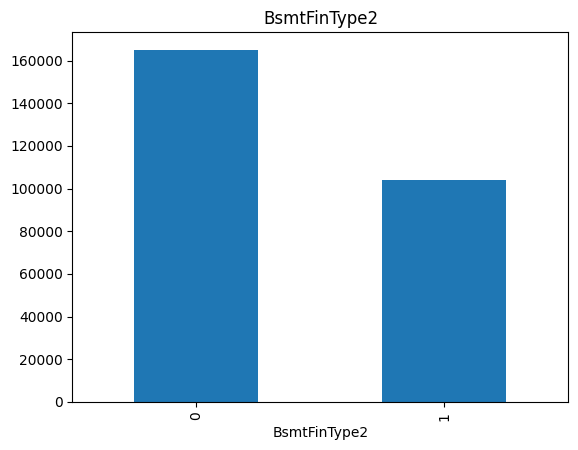

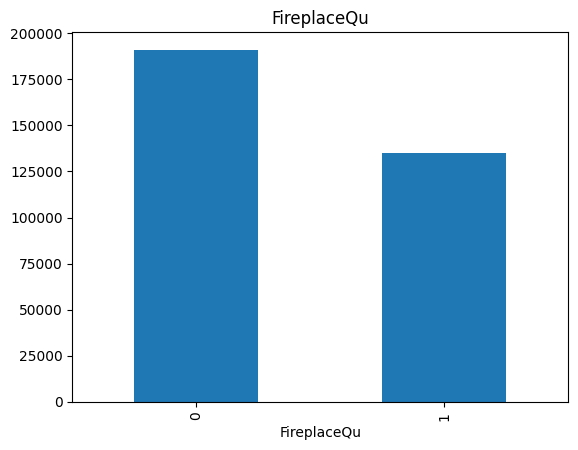

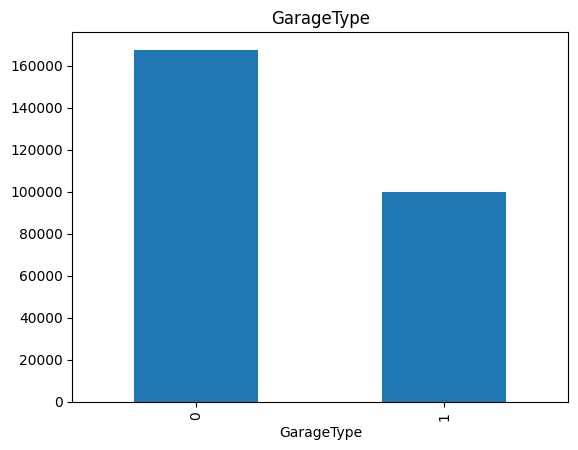

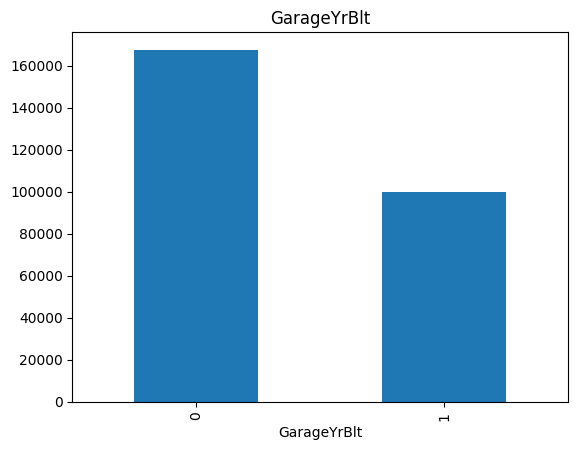

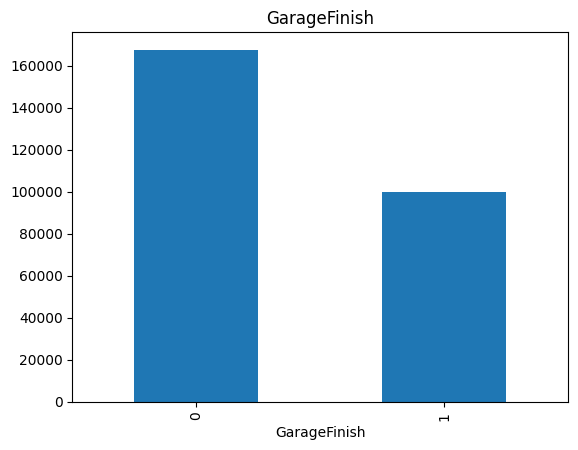

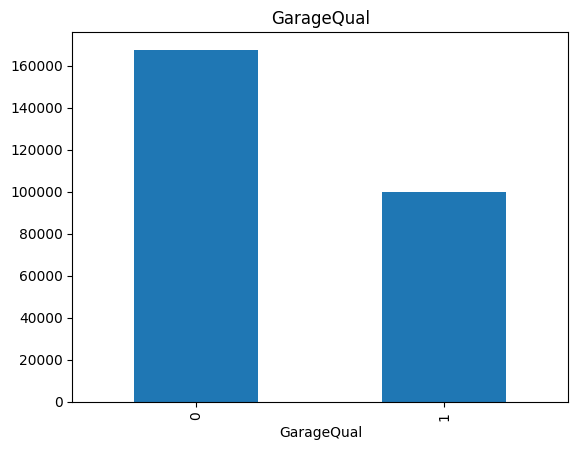

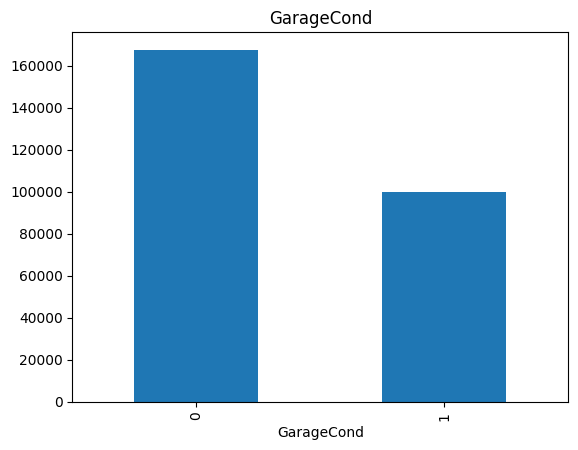

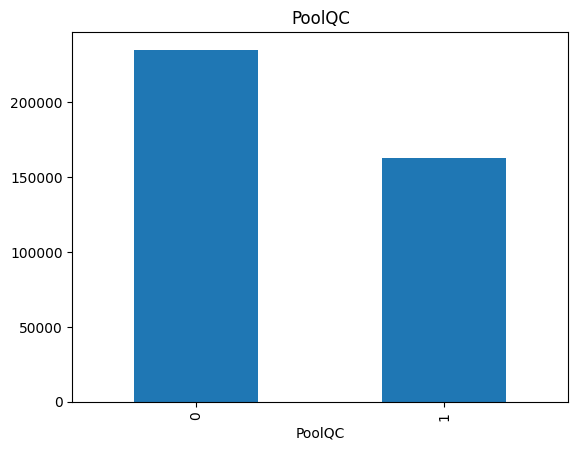

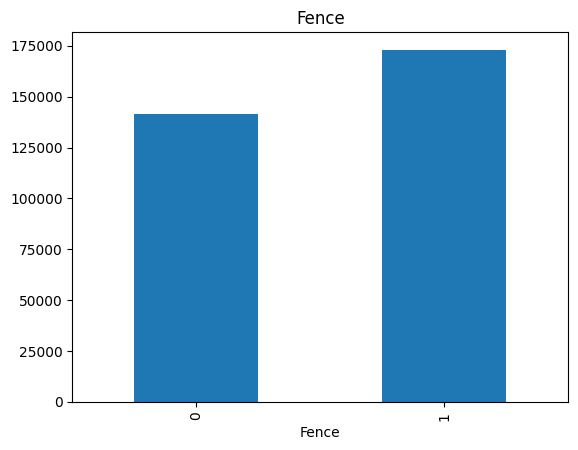

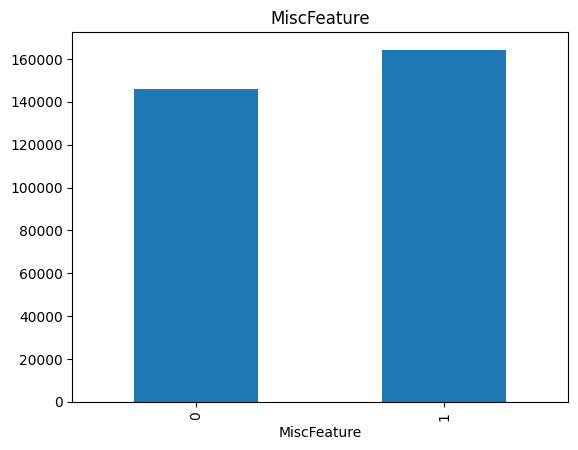

In [ ]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

 Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section.
 From the above dataset some of the features like Id is not required

In [ ]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 1460


##Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering .

In [ ]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

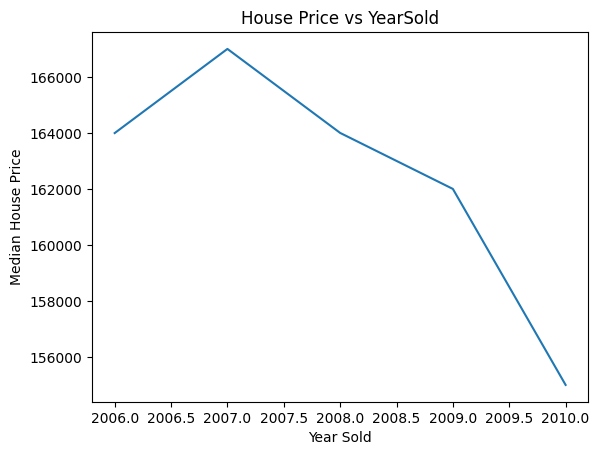

In [ ]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [ ]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

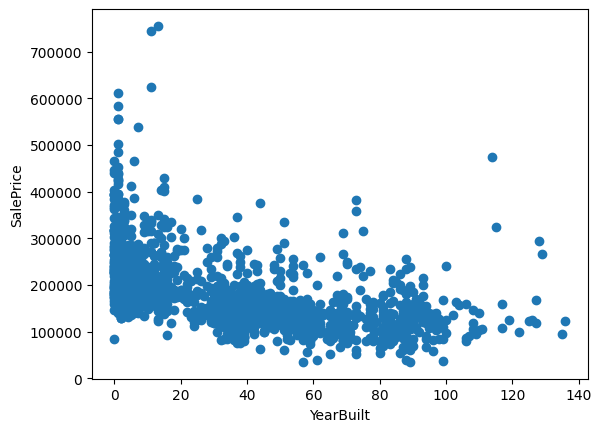

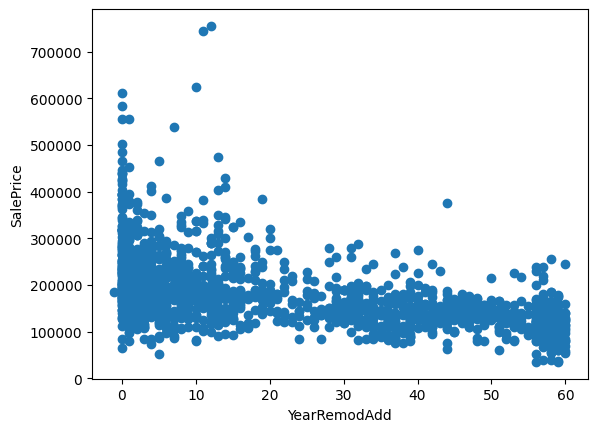

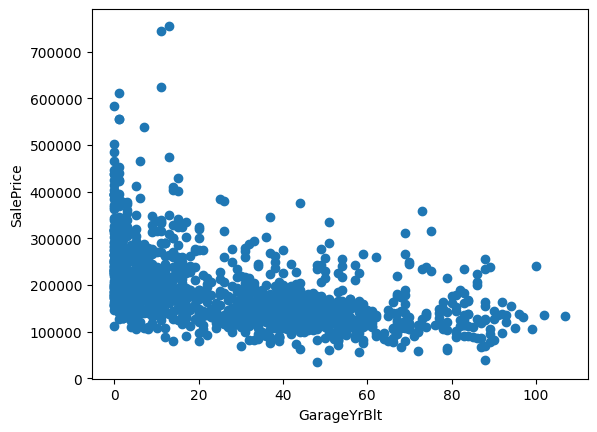

In [ ]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()




In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [ ]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
dataset[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

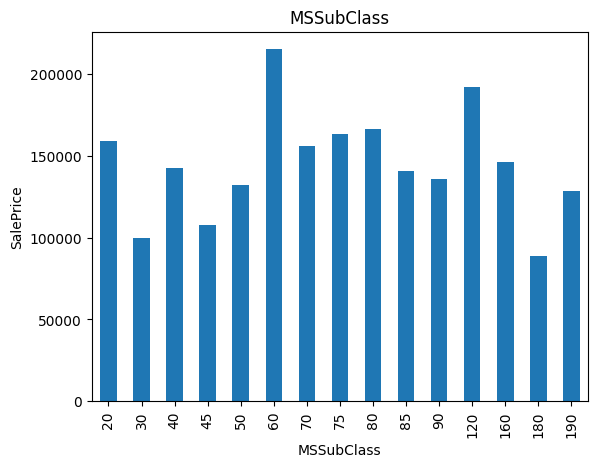

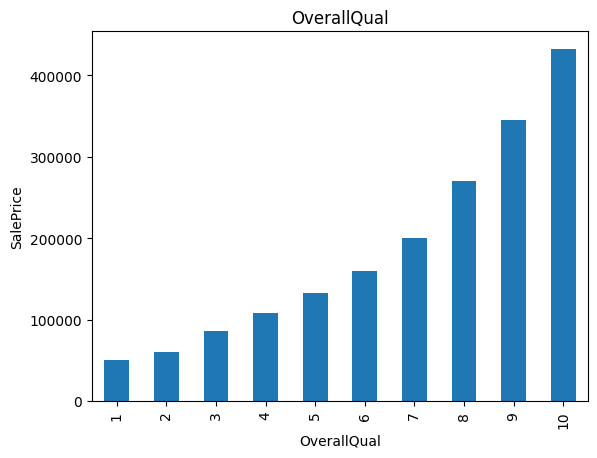

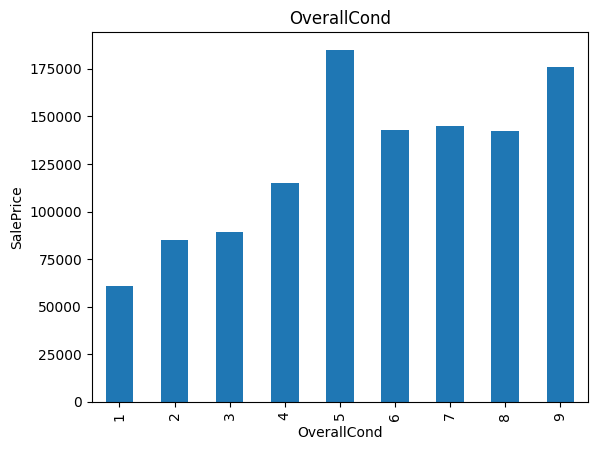

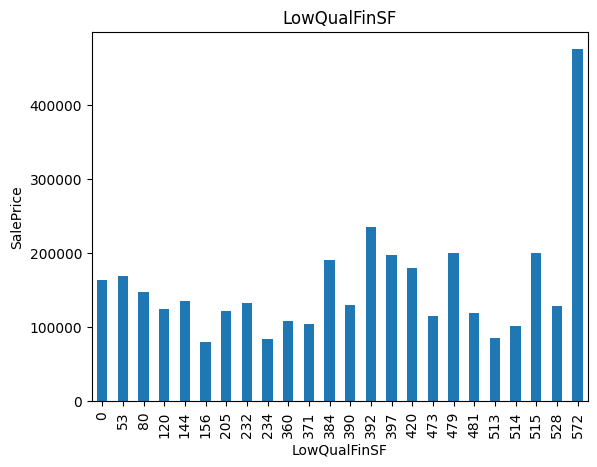

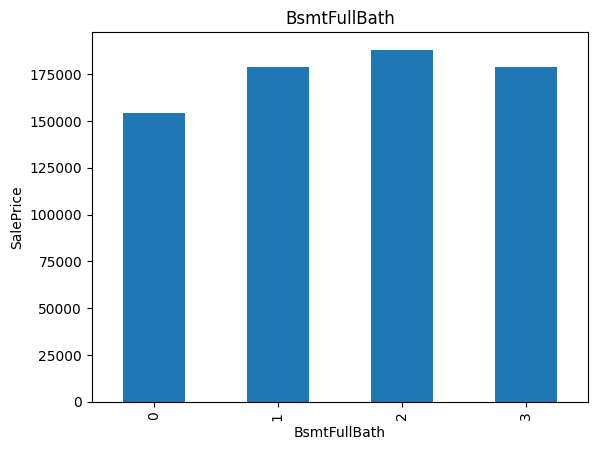

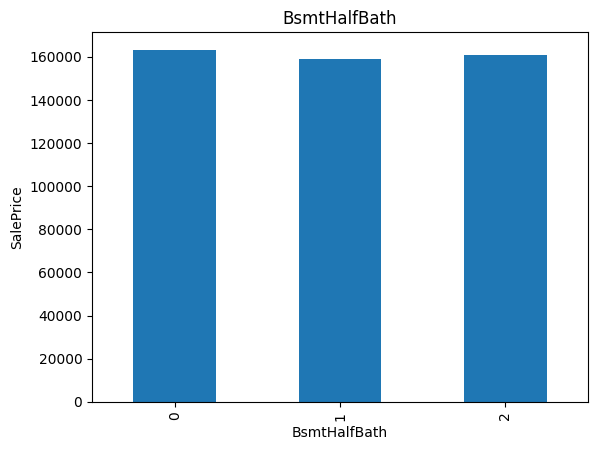

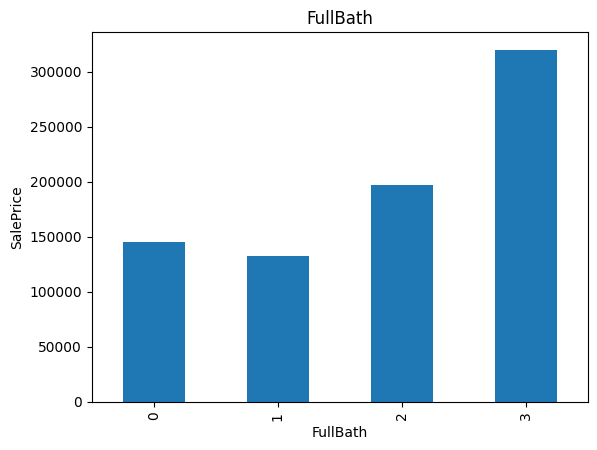

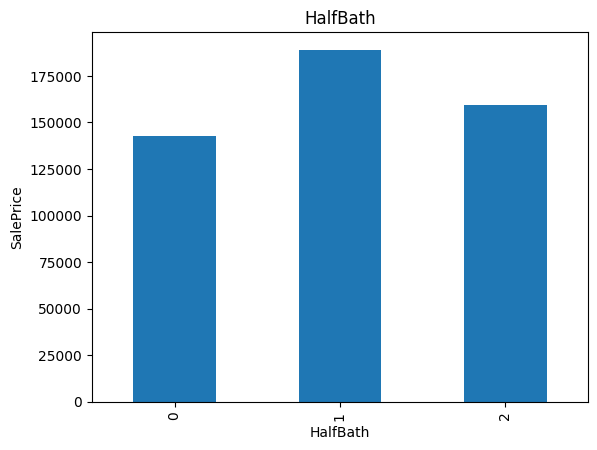

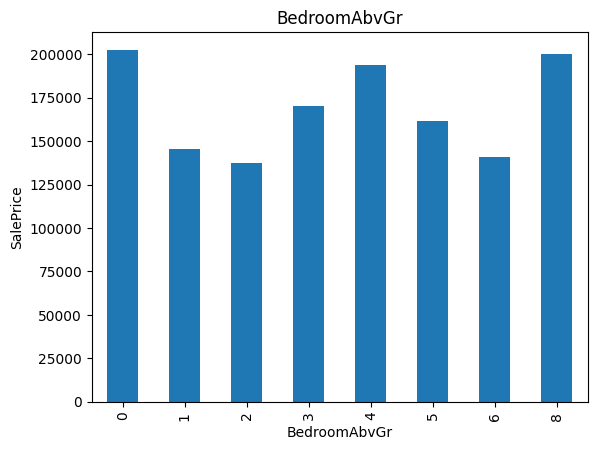

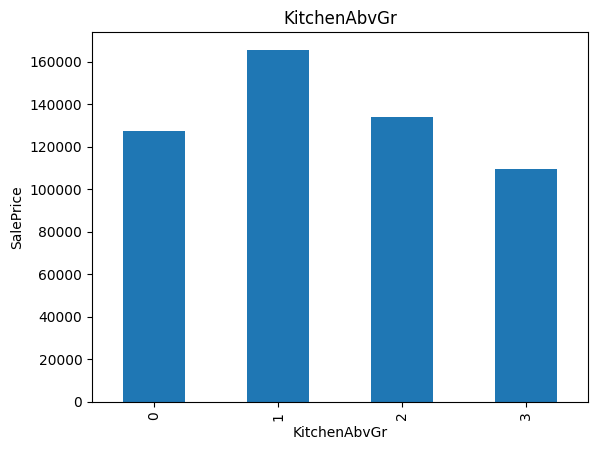

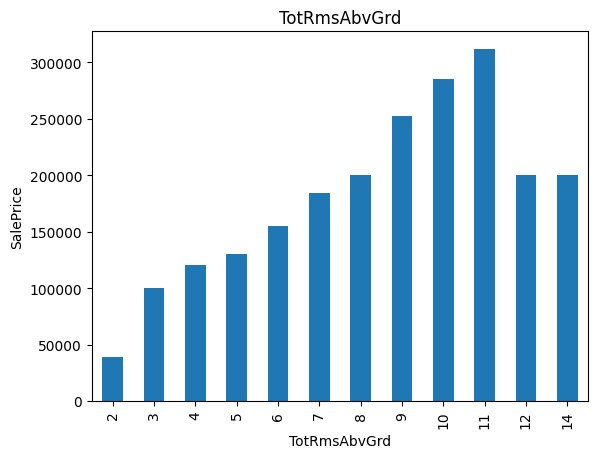

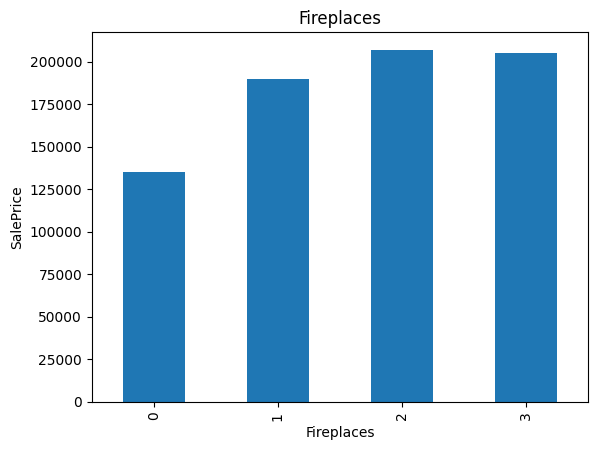

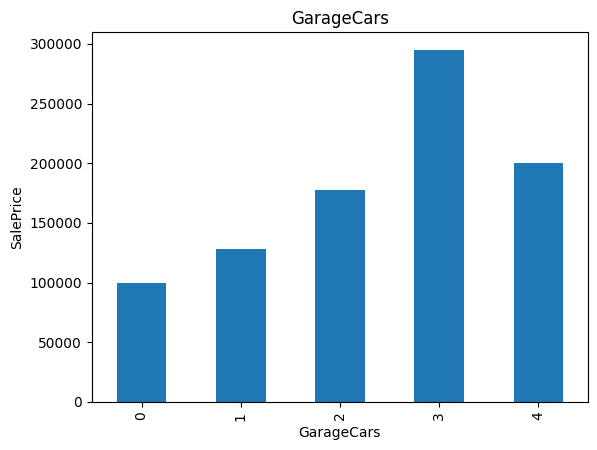

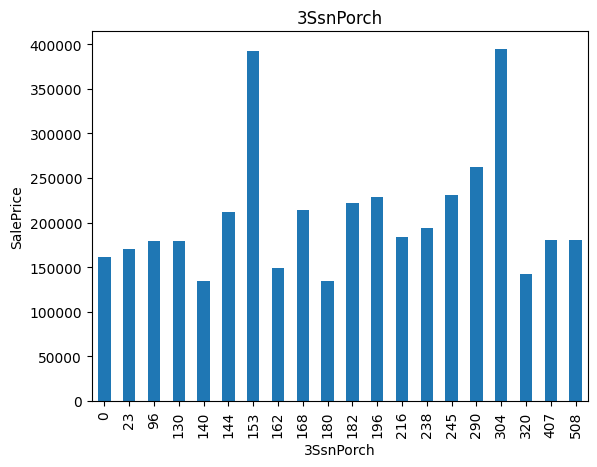

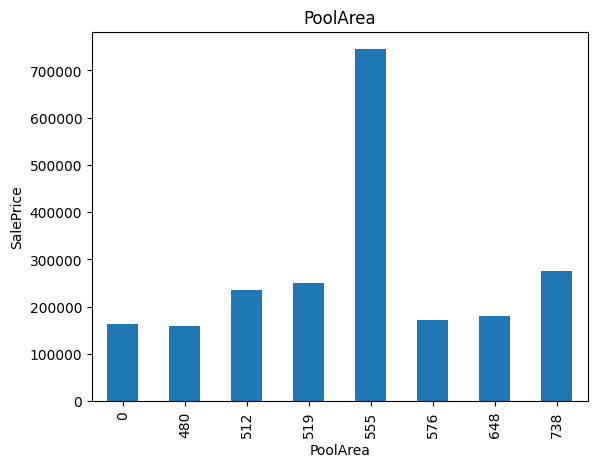

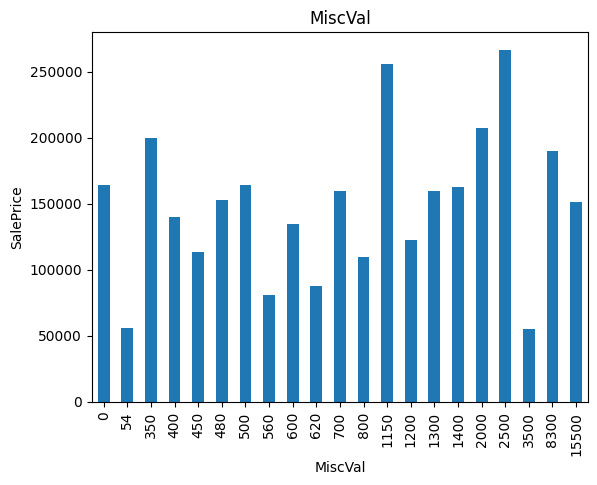

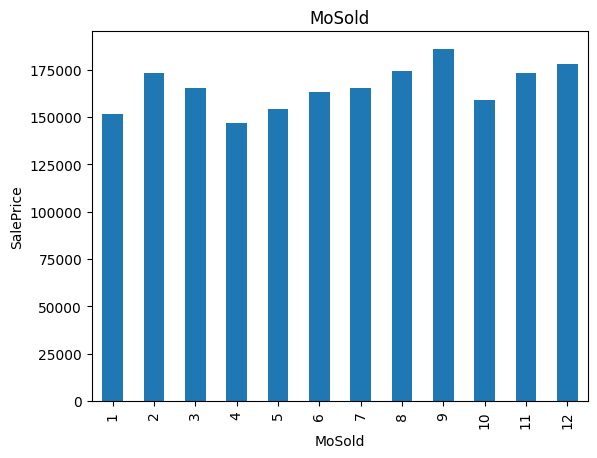

In [ ]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## There is a relationship between variable number and SalePrice

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


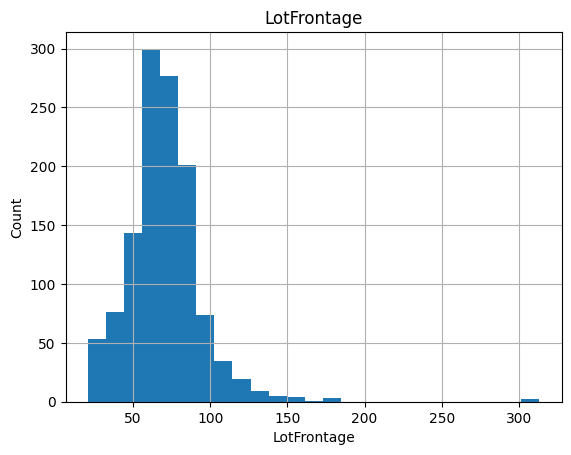

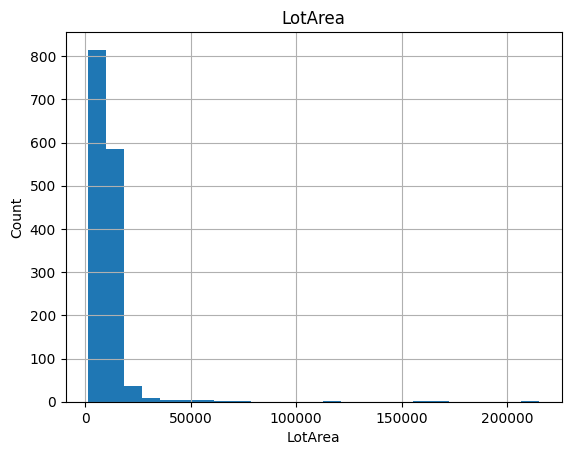

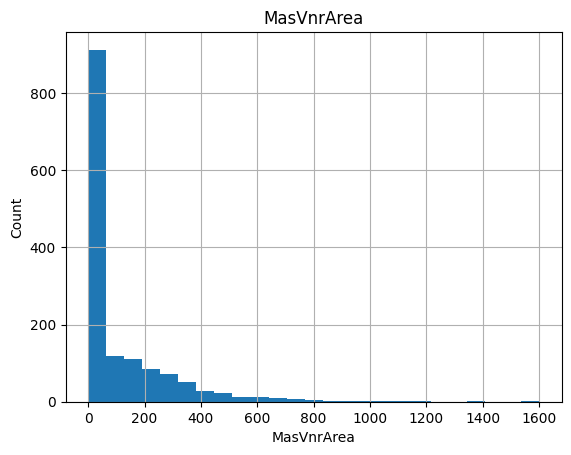

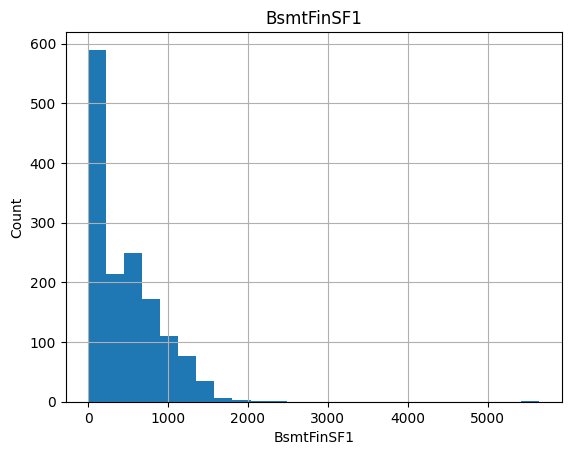

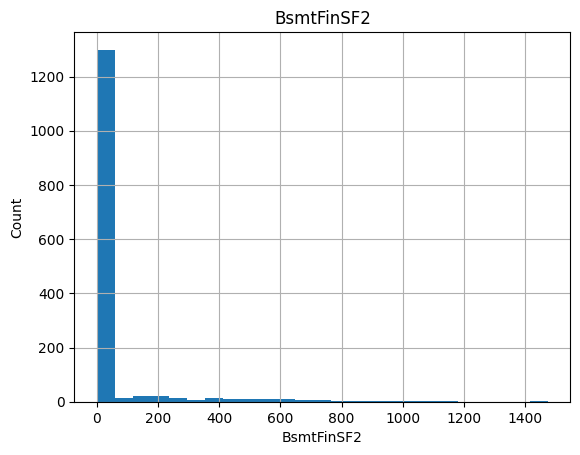

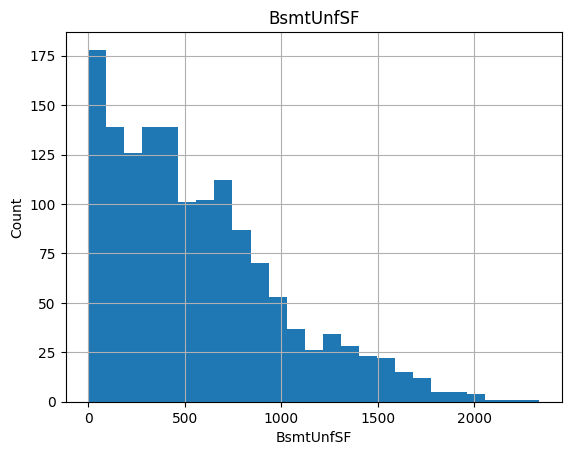

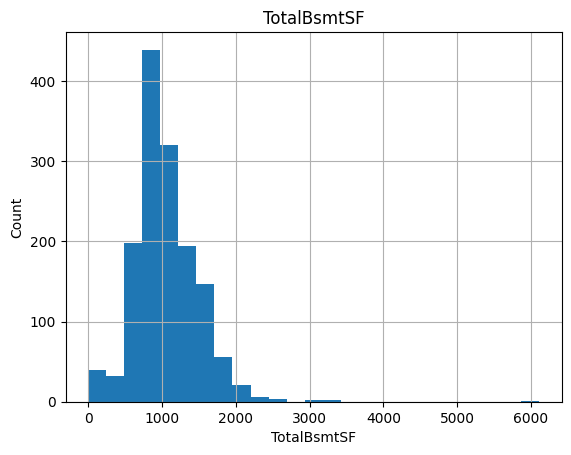

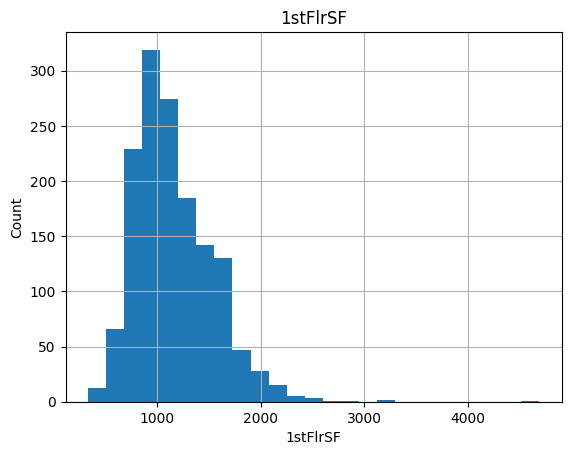

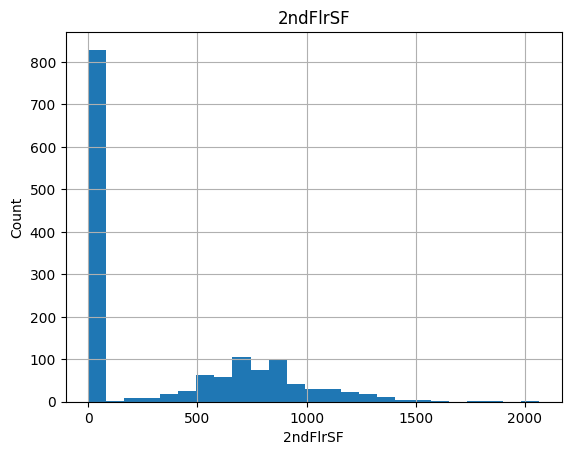

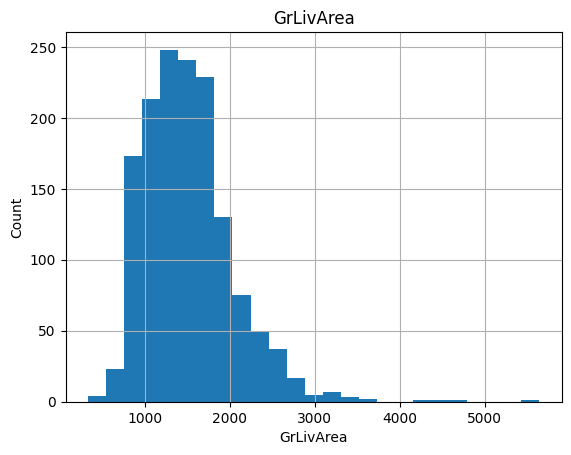

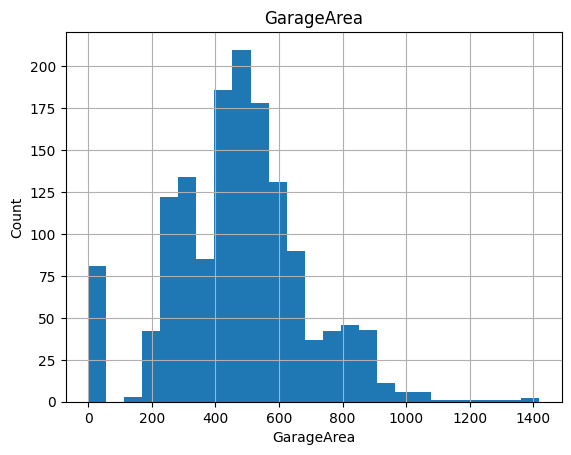

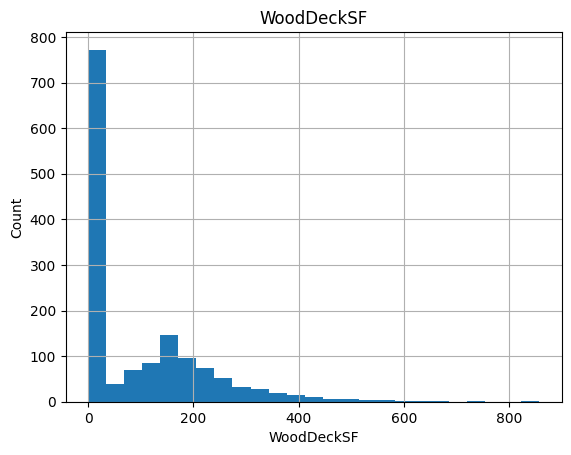

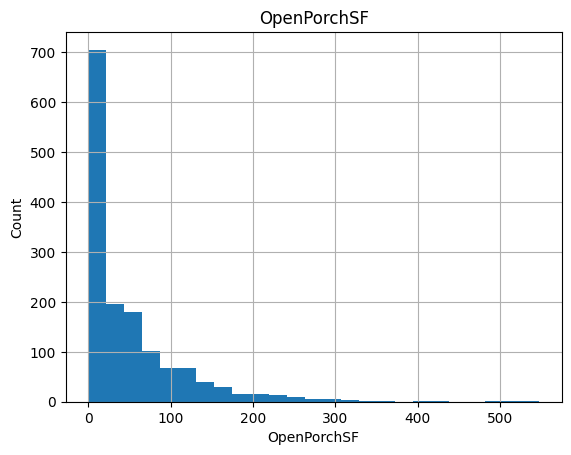

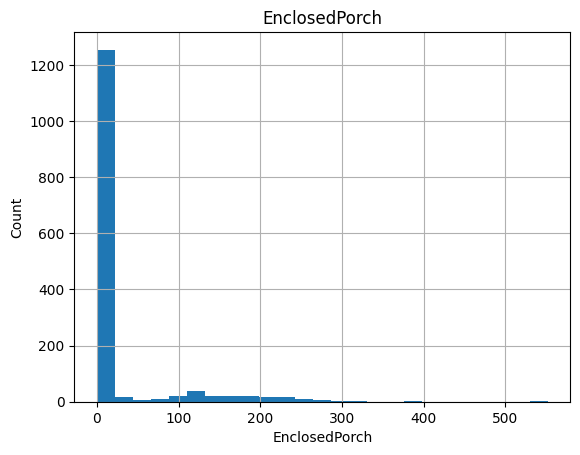

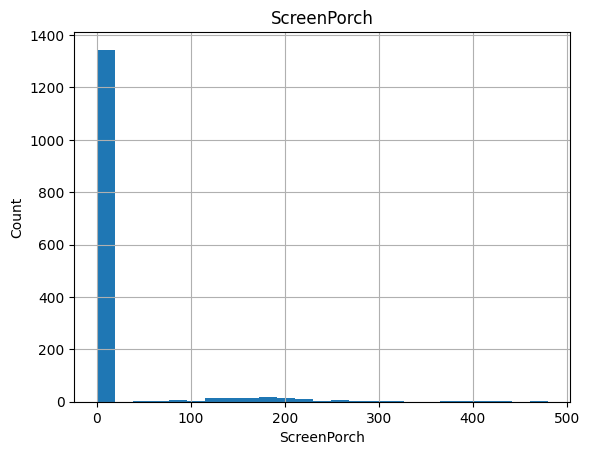

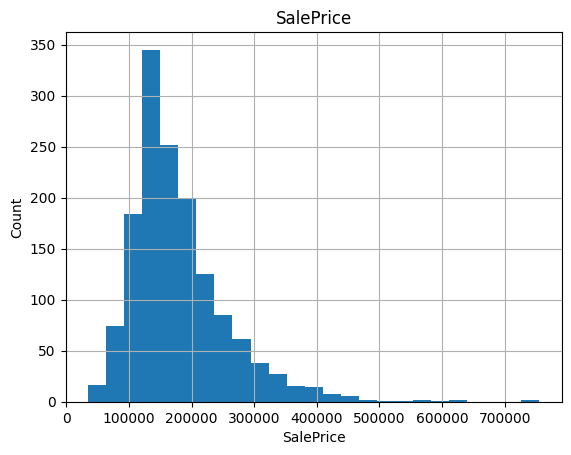

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

##Exploratory Data Analysis Part 2

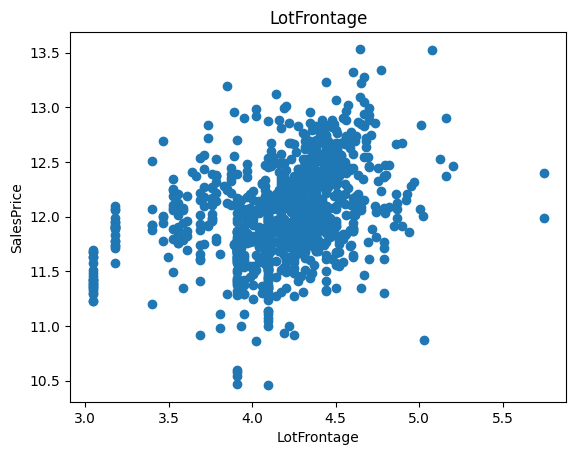

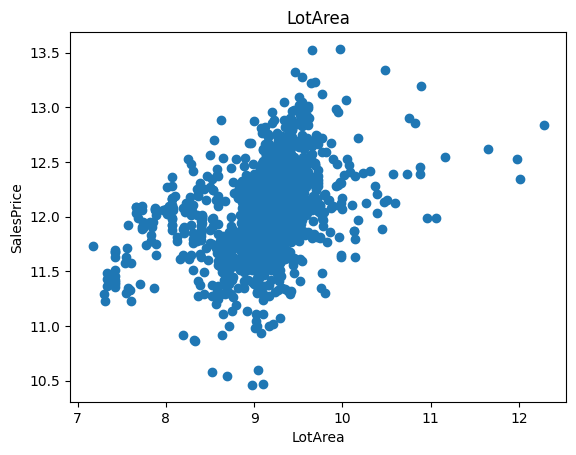

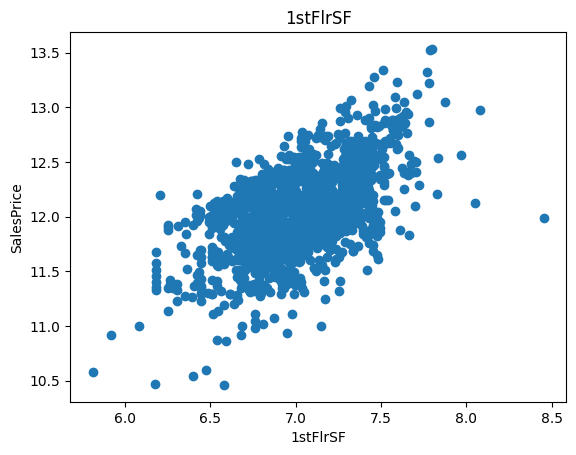

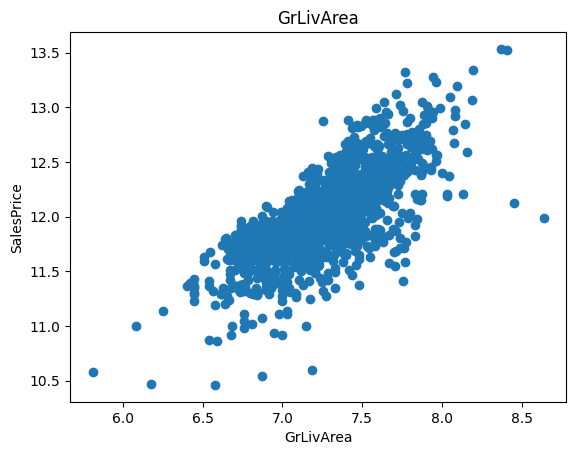

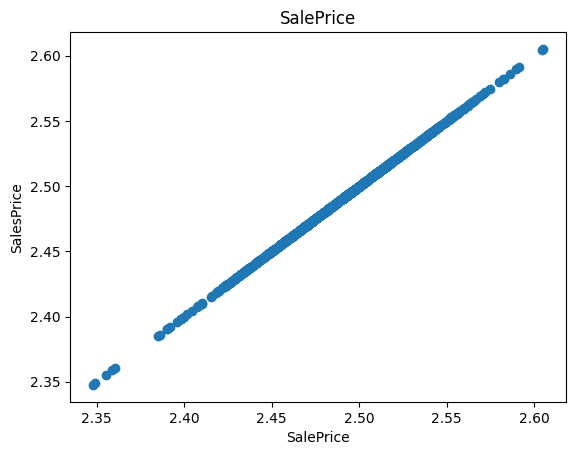

In [ ]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()



##Outliers

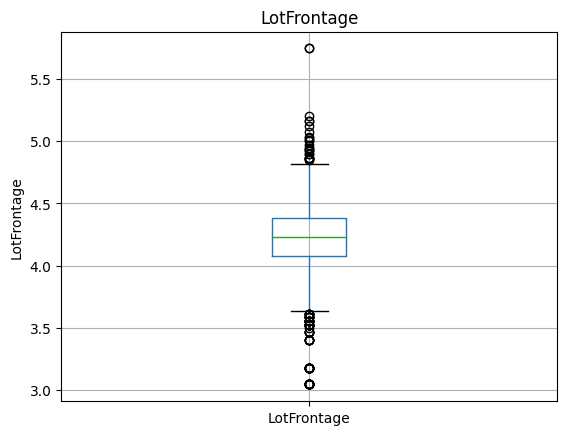

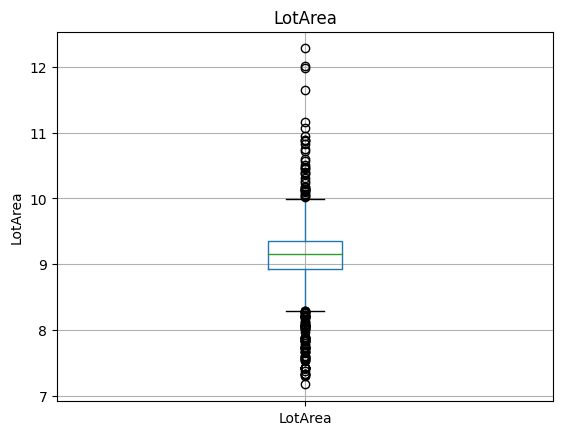

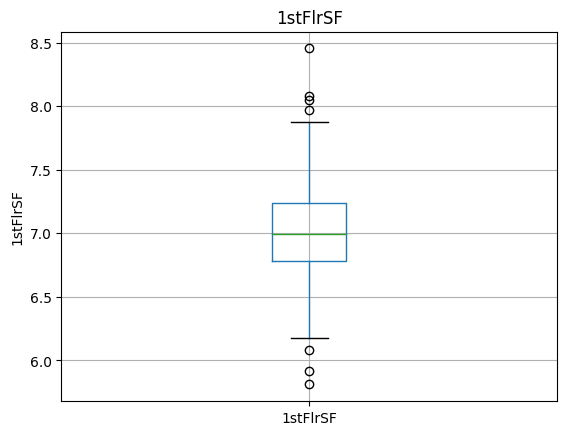

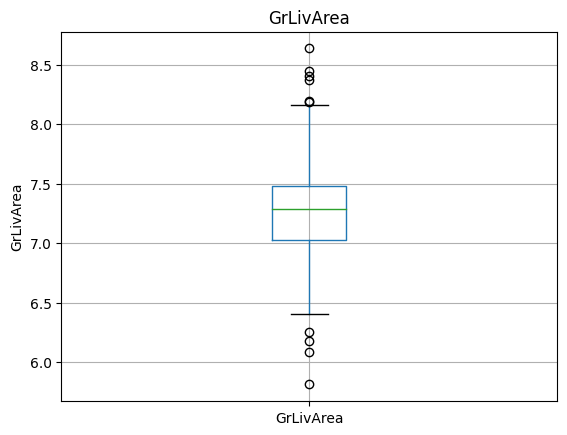

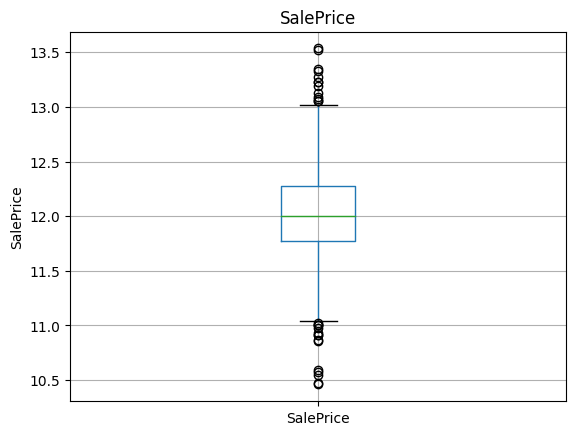

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()



##Categorical Variables

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
dataset[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

## Find out the relationship between categorical variable and dependent feature SalesPrice

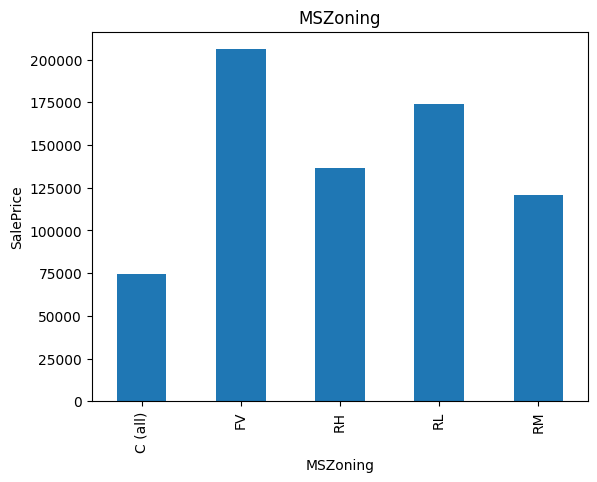

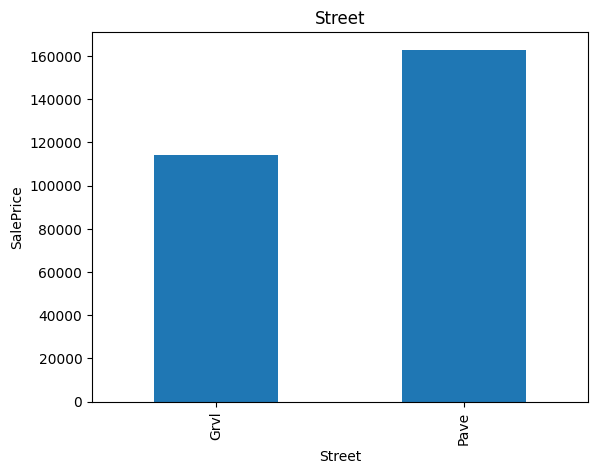

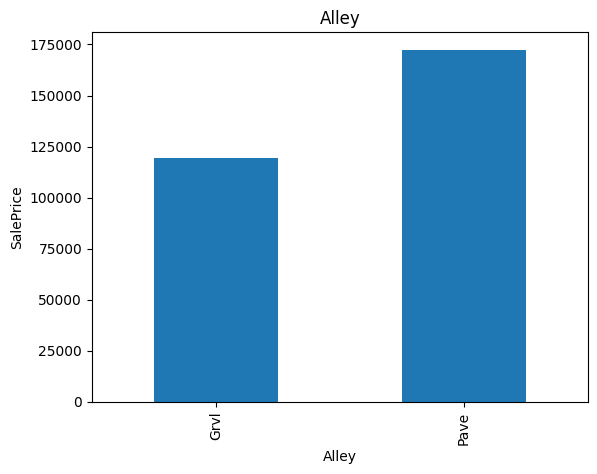

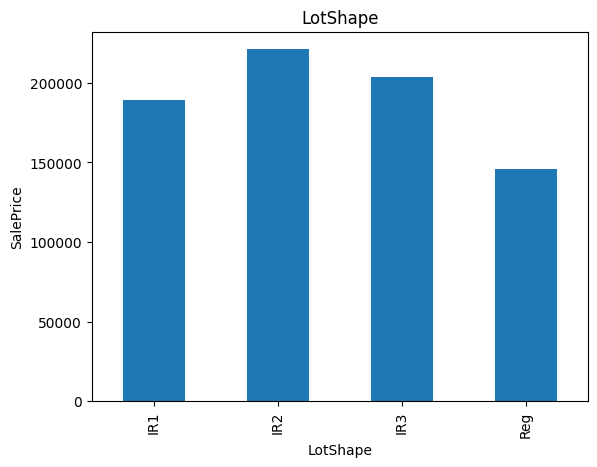

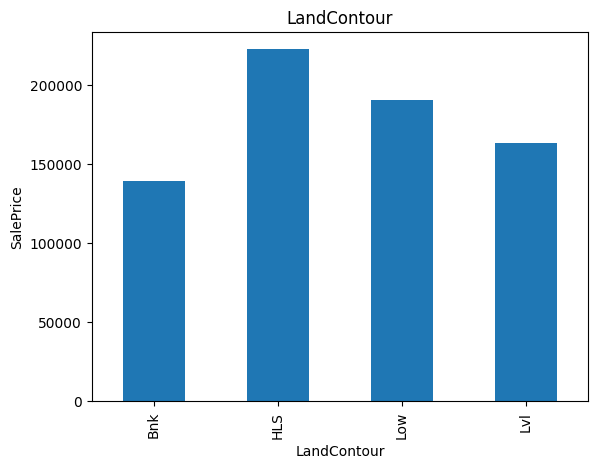

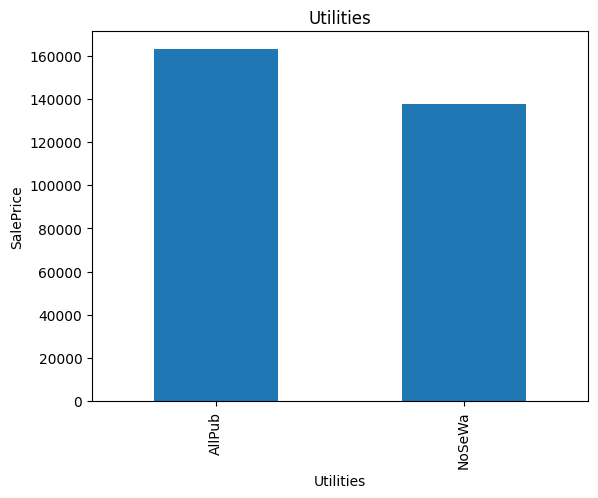

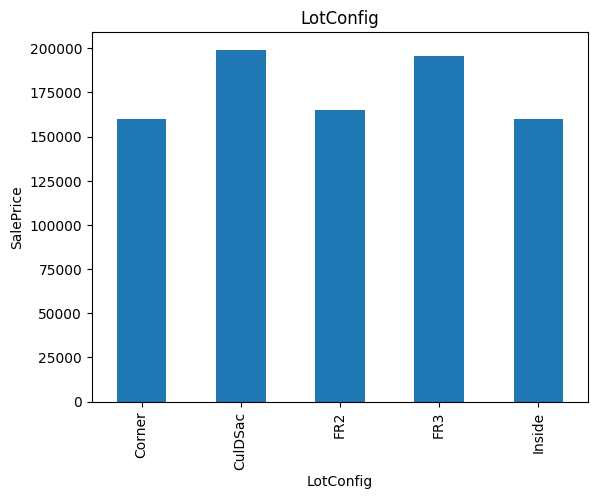

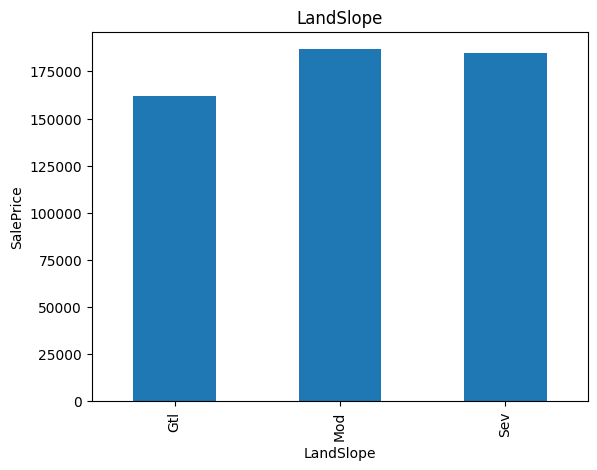

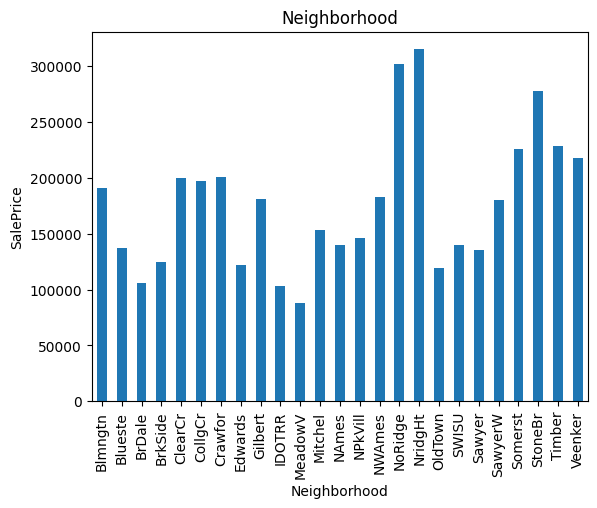

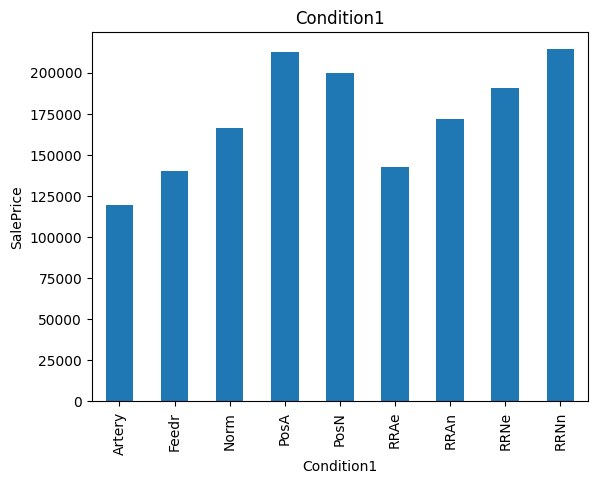

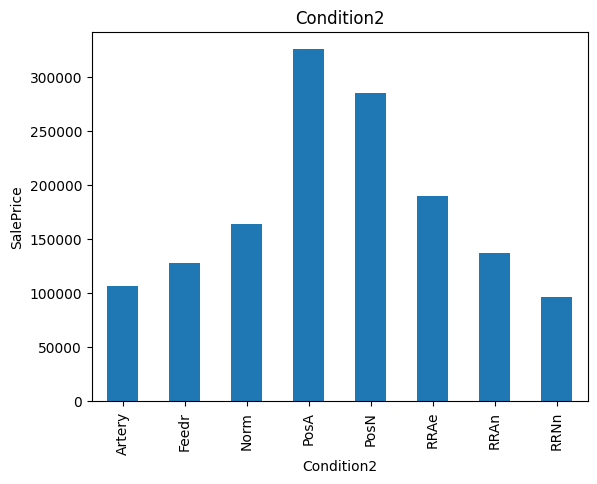

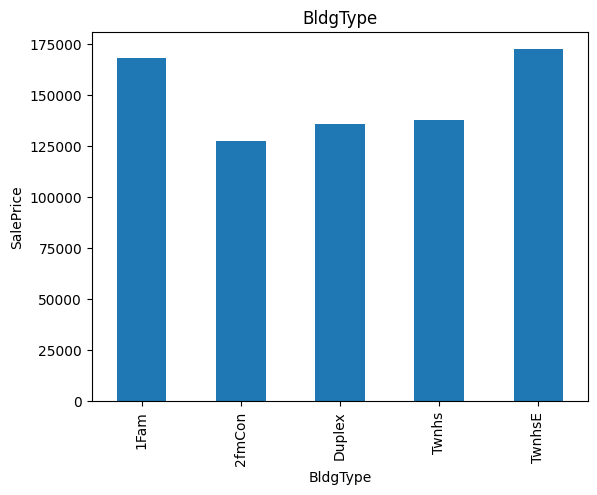

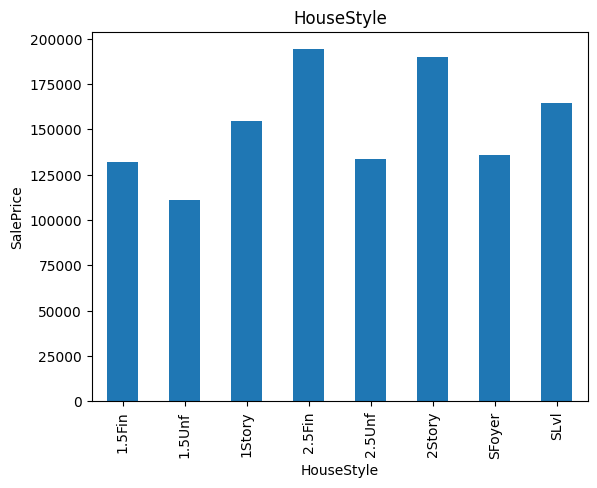

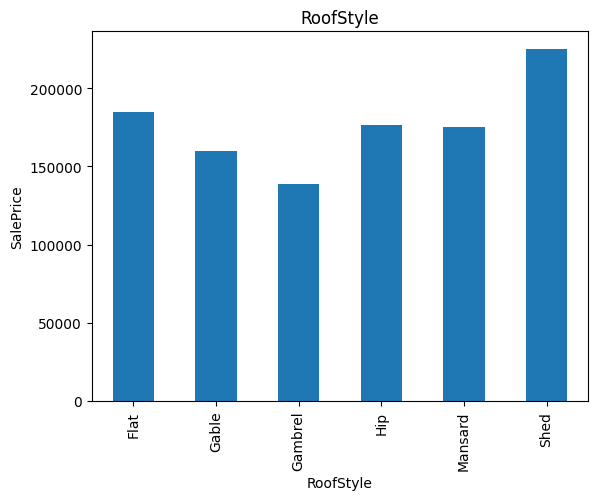

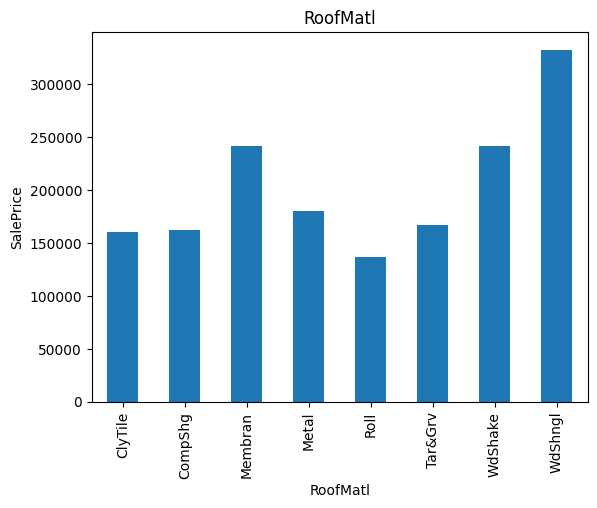

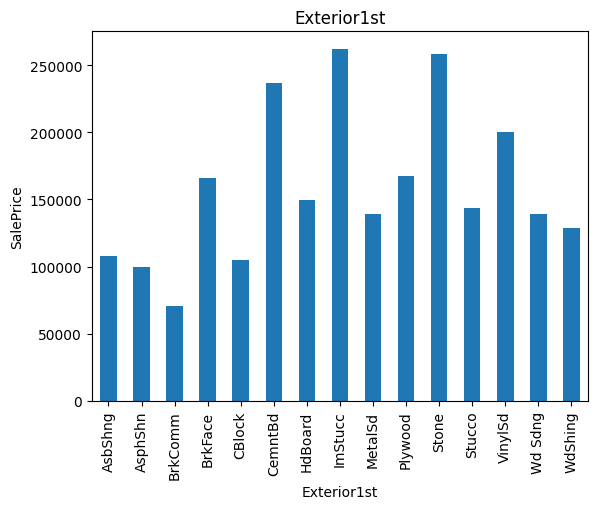

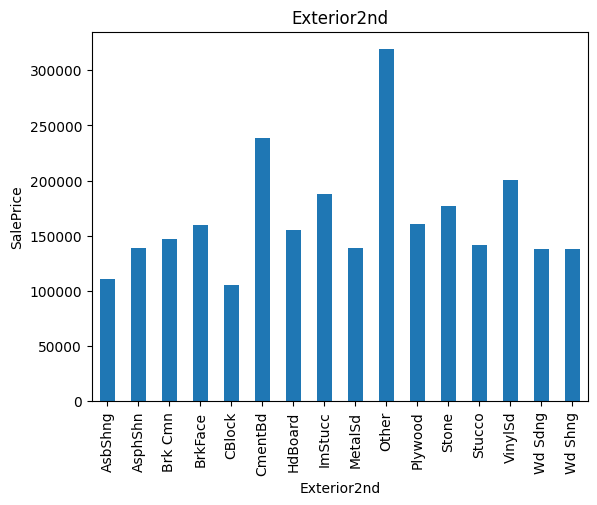

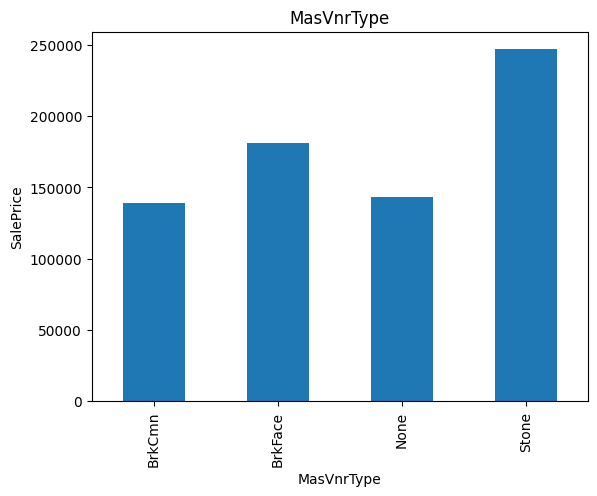

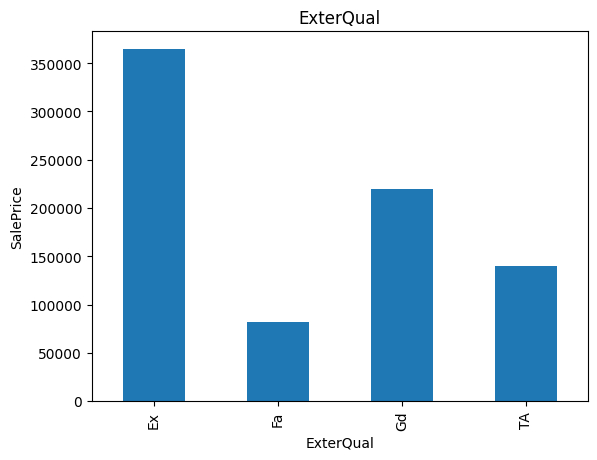

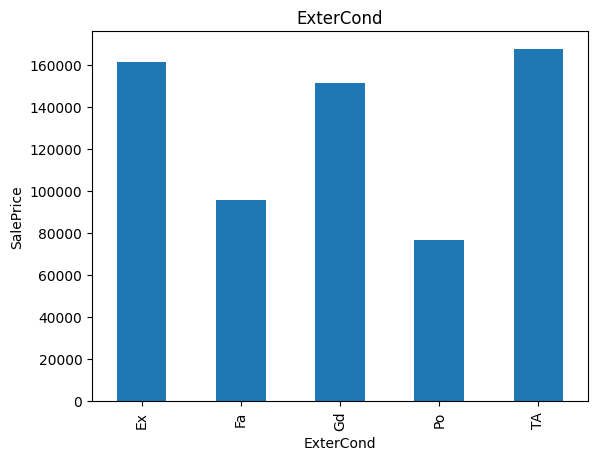

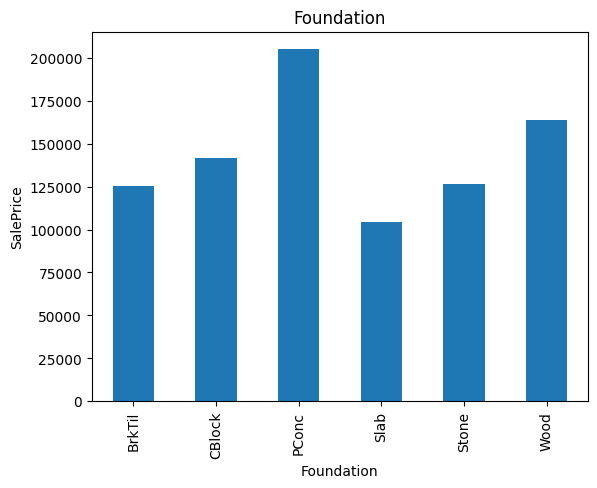

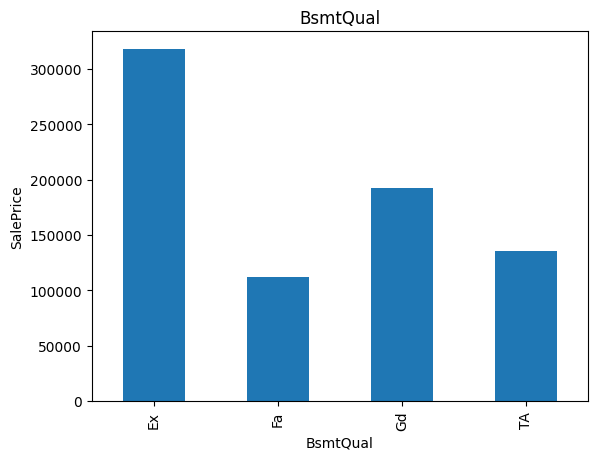

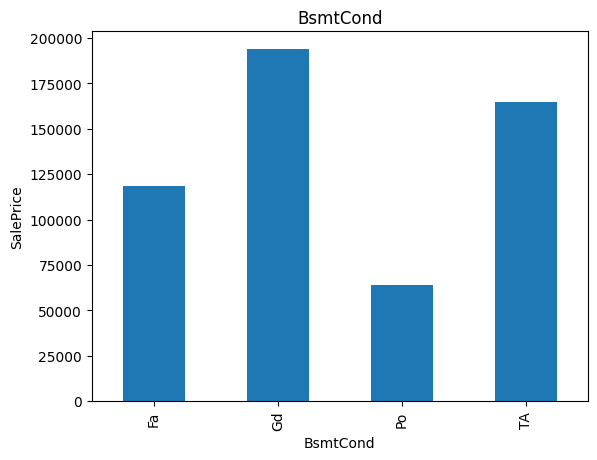

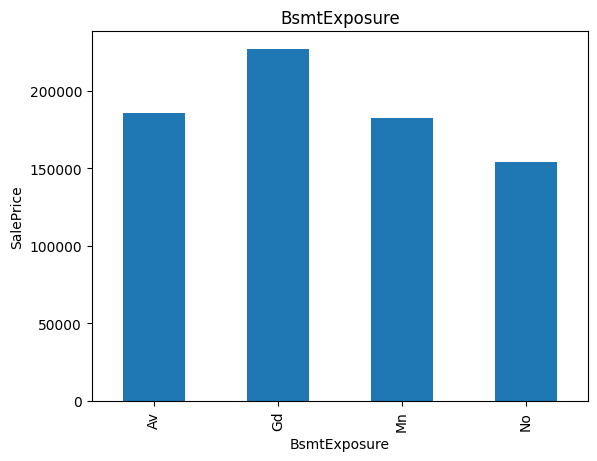

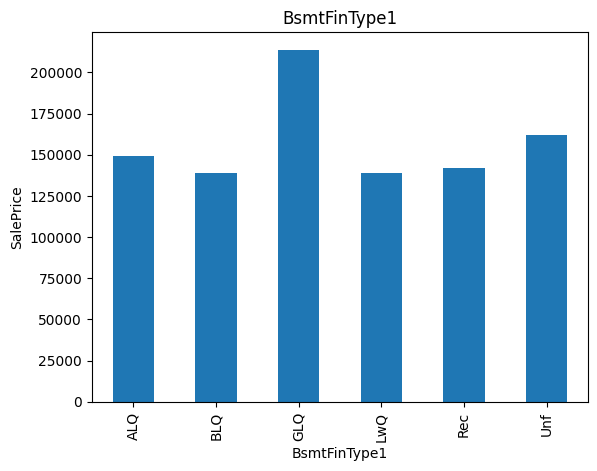

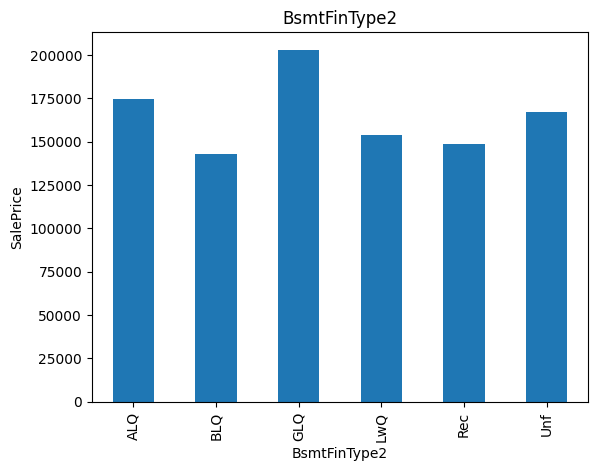

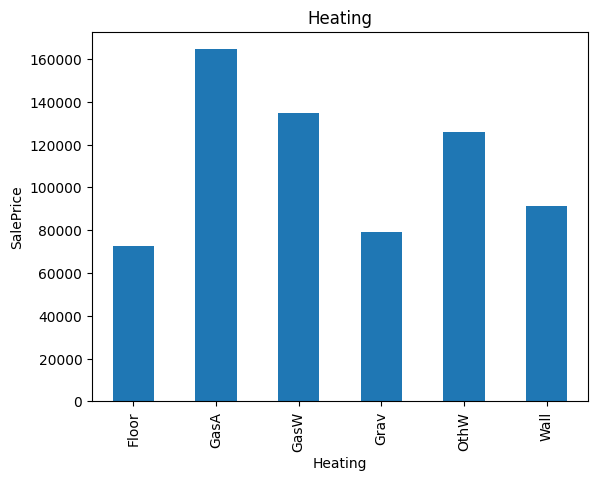

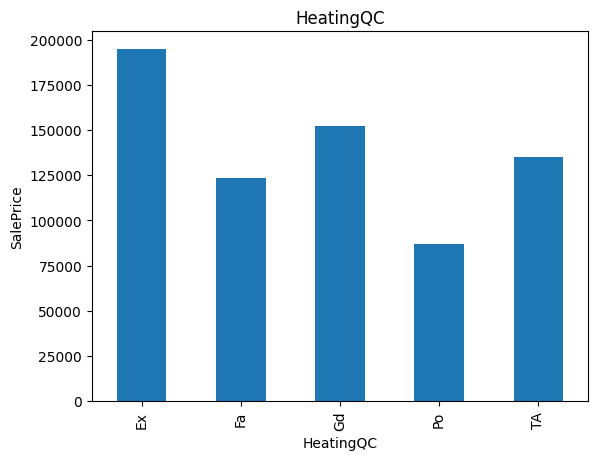

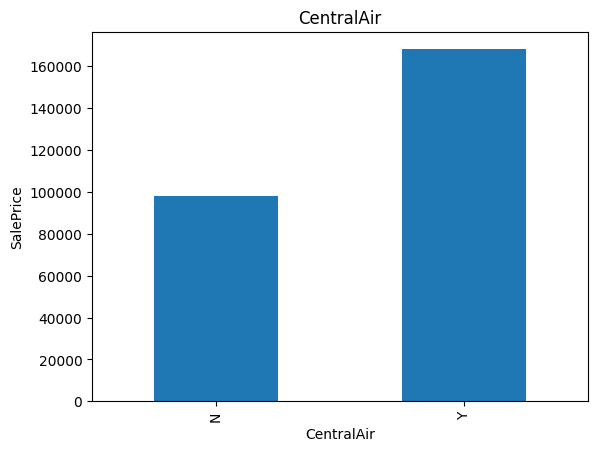

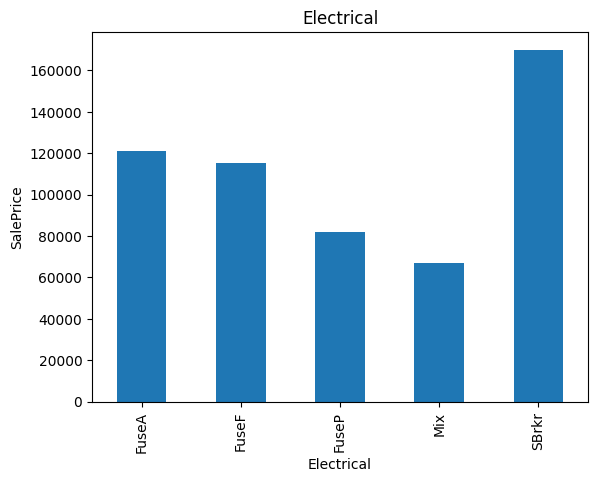

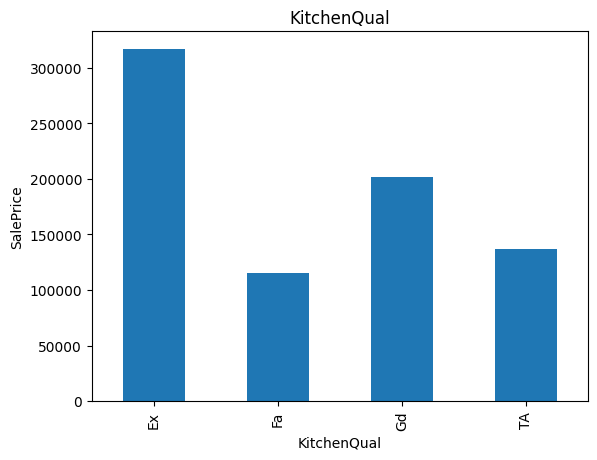

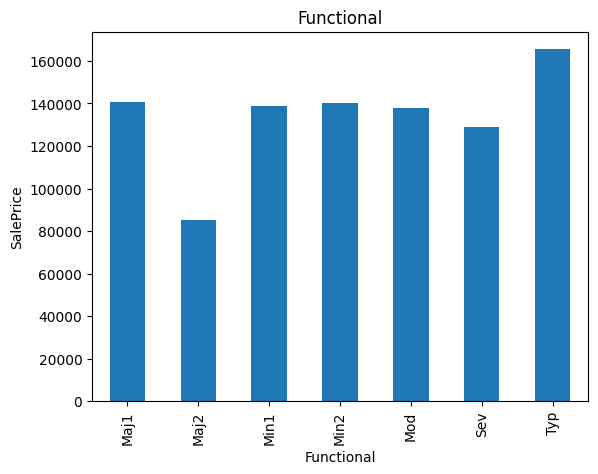

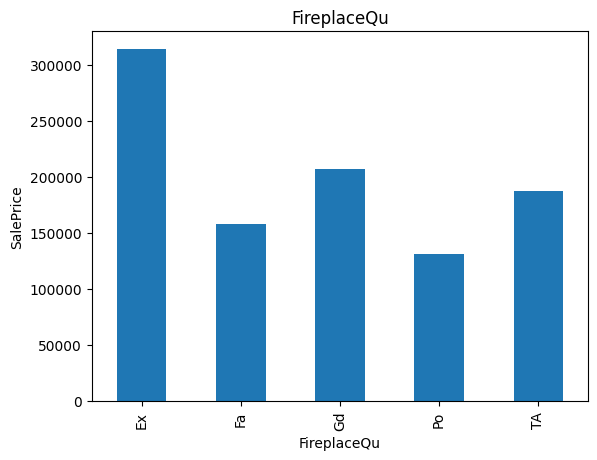

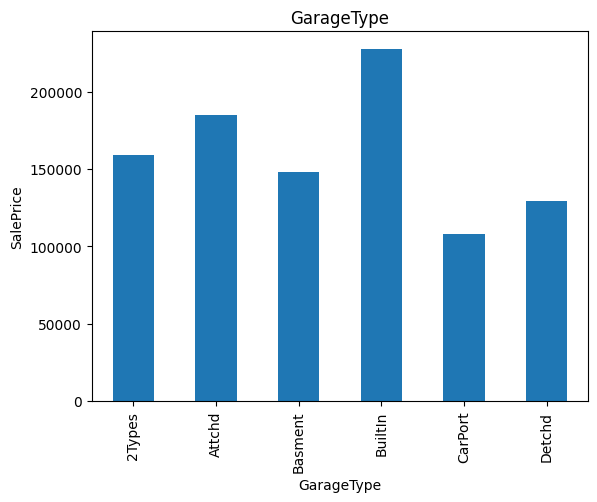

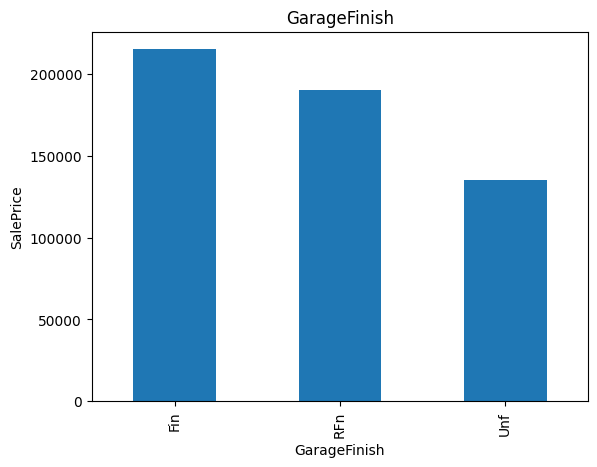

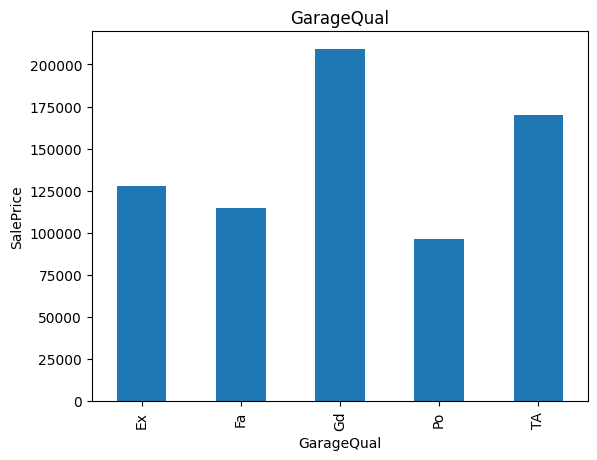

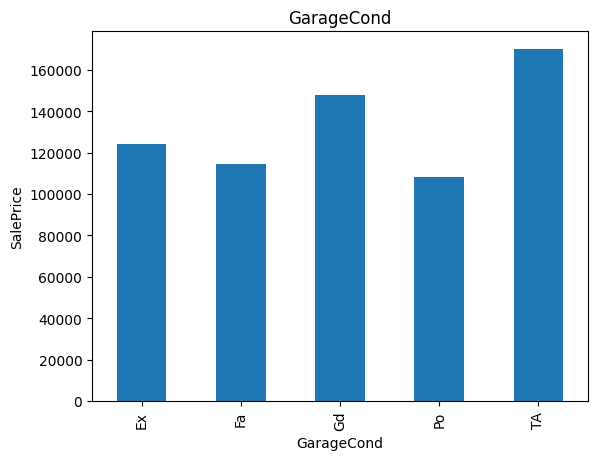

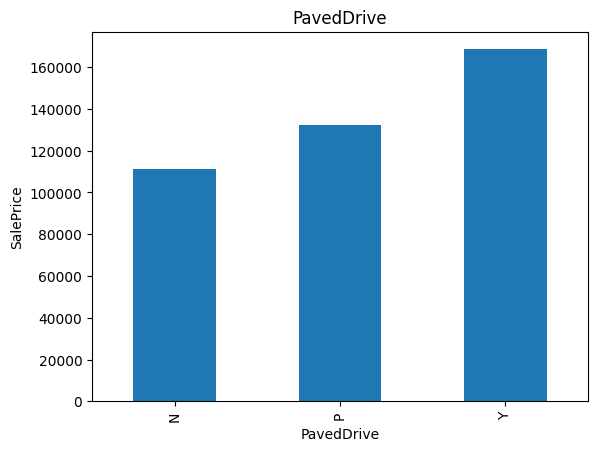

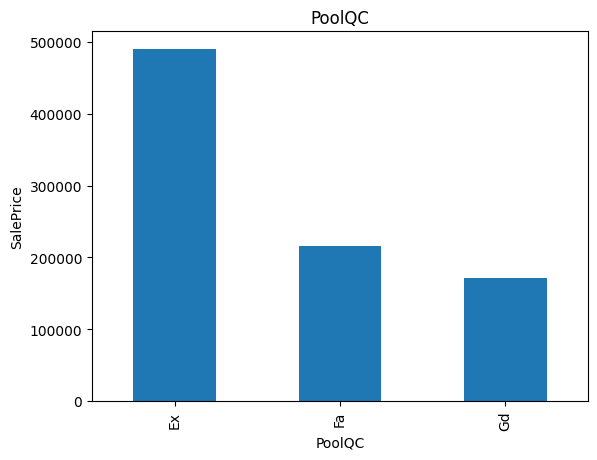

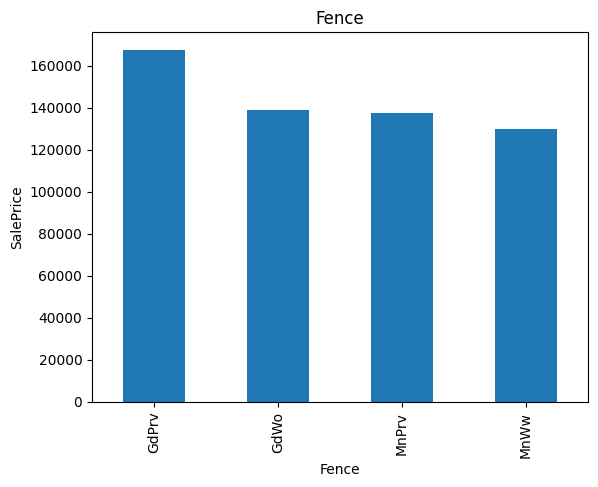

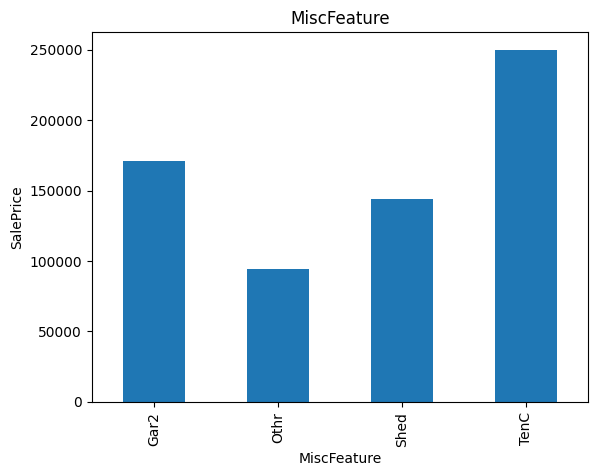

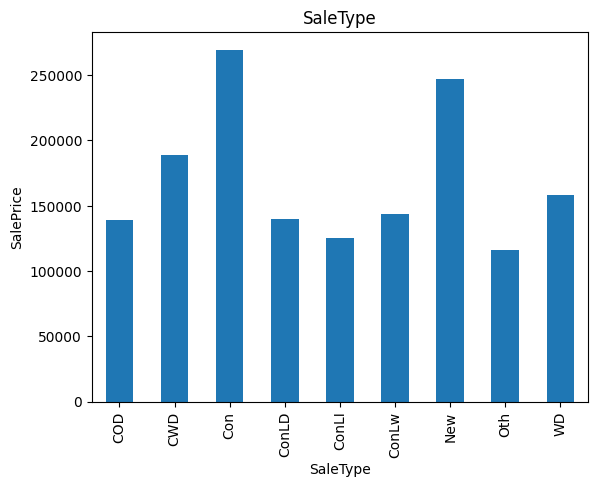

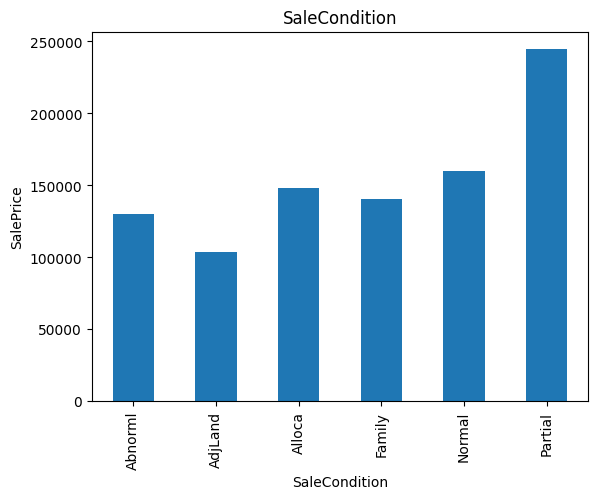

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Advance House Price Prediction- Exploratory Data Analysis- Part 2

##Advanced Housing Prices- Feature Engineering
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

We will be performing all the below steps in Feature Engineering

Missing values
Temporal variables
Categorical variables: remove rare labels
Standarise the values of the variables to the same range

##Advance House Price Prediction-Feature Engineering Part 1
Lec 41

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
dataset=pd.read_csv('train.csv')
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1314, 81), (146, 81))

##Missing Values

In [ ]:
#### Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [ ]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [ ]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()

    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)

dataset[numerical_with_nan].isnull().sum()



LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
dataset.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

In [ ]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:

    dataset[feature]=dataset['YrSold']-dataset[feature]

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [ ]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

##Numerical Variables
##Since the numerical variables are skewed we will perform log normal distribution

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [ ]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

##Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [ ]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')


In [ ]:
dataset.head(100)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0     1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1     2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2     3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3     4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4     5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
..  ...         ...      ...          ...       ...    ...      ...      ...   
95   96          60       RL     4.234107  9.186560   Pave  Missing      IR2   
96   97          20       RL     4.356709  9.236398   Pave  Missing      IR1   
97   98          20       RL     4.290459  9.298443   Pave  Missing      Reg   
98   99          30       RL     4.442651  9.270965   Pave  Missing      Reg   
99  100          20       RL     4.343805  9.139918   Pave  Missing      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8         16   
96       Norm     1Fam     1Story            7            5          7   
97       Norm     1Fam     1Story            4            5         42   
98       Norm     1Fam     1Story            5            5         90   
99       Norm     1Fam     1Story            4            5         51   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0              5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             31     Gable  CompShg     MetalSd     MetalSd       None   
2              6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4              8     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95            16     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96             7     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97            42       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98            60     Gable  CompShg     Wd Sdng     Wd Sdng       None   
99            51     Gable  CompShg     Plywood     Plywood       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   
5   6          50         3     4.442651  9.554993       1      2         1   
6   7          20         3     4.317488  9.218705       1      2         0   
7   8          60         3     4.234107  9.247829       1      2         1   
8   9          50         1     3.931826  8.719317       1      2         0   
9  10         190         3     3.912023  8.911934       1      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   
5            1          1          0          0             9           2   
6            1          1          0          0            18           2   
7            1          1          1          0            12           5   
8            1          1          0          0             4           0   
9            1          1          1          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   
5           1         3           1            5            5         16   
6           1         3           3            8            5          3   
7           1         3           5            7            6         36   
8           1         3           1            7            5         77   
9           0         0           2            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   
5            14          0         0           10           10           1   
6             2          0         0           10           10           4   
7            36          0         0            6            5           4   
8            58          0         0            8            4           1   
9            58          0         0            4            3           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   
5         0.0          1          3           3         3         3   
6       186.0          2          3           4         4         3   
7       240.0        

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [ ]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [ ]:
dataset.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6         706             5           0   
1             4             4         978             5           0   
2             2             6         486             5           0   
3             1             4         216             5           0   
4             3             6         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        2          4           1           3   
1        284         1262        2          4           1           3   
2        434          920        2          4           1           3   
3        540          756        2          3           1           3   
4        490         1145        2          4           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  6.752270       854             0   7.444249             1             0   
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            1             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

##Feature Scaling

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [ ]:
data.to_csv('X_train.csv',index=False)

##Advance House Price Prediction-Feature Engineering Part 2
Lec 42

##Advance House Price Prediction-Feature Selection

Lec 43

Feature Selection Advanced House Price Prediction
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
dataset=pd.read_csv('X_train.csv')

In [ ]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [ ]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [ ]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'

In [ ]:
feature_sel_model.get_support()

ValueError: when `importance_getter=='auto'`, the underlying estimator Lasso should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

In [ ]:
selected_feat

In [ ]:
X_train=X_train[selected_feat]

In [ ]:
 X_train.head()

##EDA And Feature Engineering- Zomato Dataset


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

##In data analysis what all things we do

1.Missing Values
2.Explore About Numerical Variables
3.Explore About categorical Variables
4.Finding Relationship between features


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
##for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]


['Cuisines']

<Axes: >

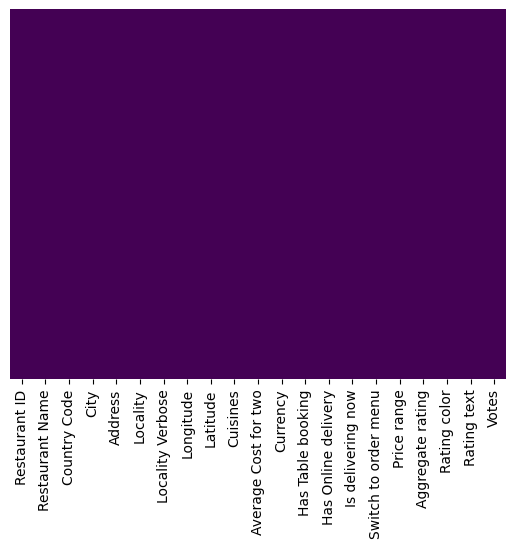

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [ ]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
country_names=final_df.Country.value_counts().index

In [ ]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7b4084ed0a00>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

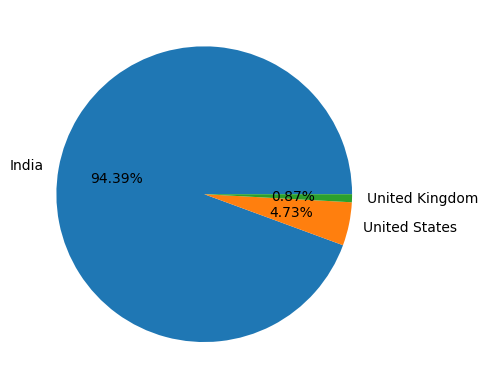

In [ ]:
## Pie Chart- Top 3 countries that uses zomato
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

##Observation:Zomato maximum records or transaction are from India After that USA and then United Kingdoms

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [ ]:
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [ ]:
# Observation
# When Rating is between 4.5 to 4.9---> Excellent
# When Rating are between 4.0 to 3.4--->very good
# when Rating is between 3.5 to 3.9----> good
# when Rating is between 3.0 to 3.4----> average
# when Rating is between 2.5 to 2.9----> average
# when Rating is between 2.0 to 2.4----> Poor

In [ ]:
ratings.head()

Aggregate rating Rating color Rating text  Rating Count
0               0.0        White   Not rated          2148
1               1.8          Red        Poor             1
2               1.9          Red        Poor             2
3               2.0          Red        Poor             7
4               2.1          Red        Poor            15

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

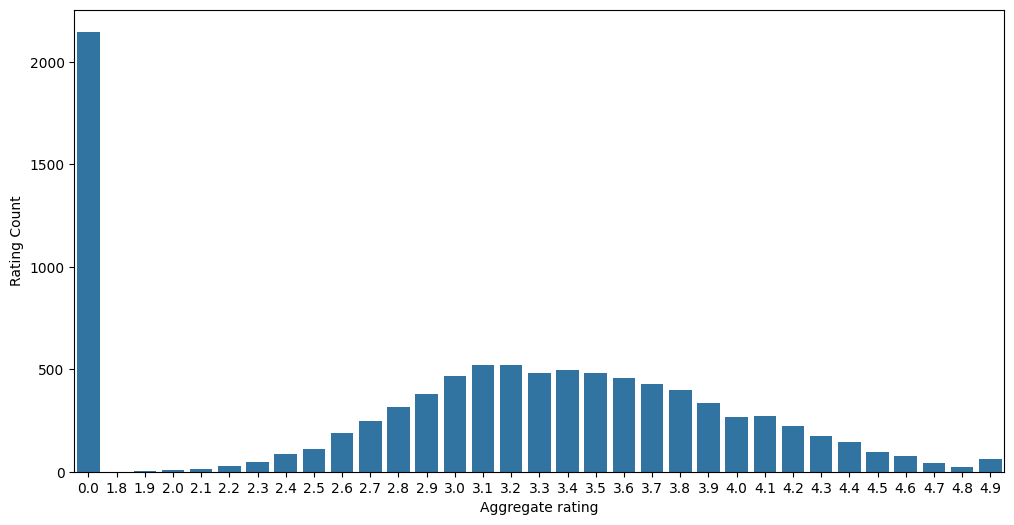

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

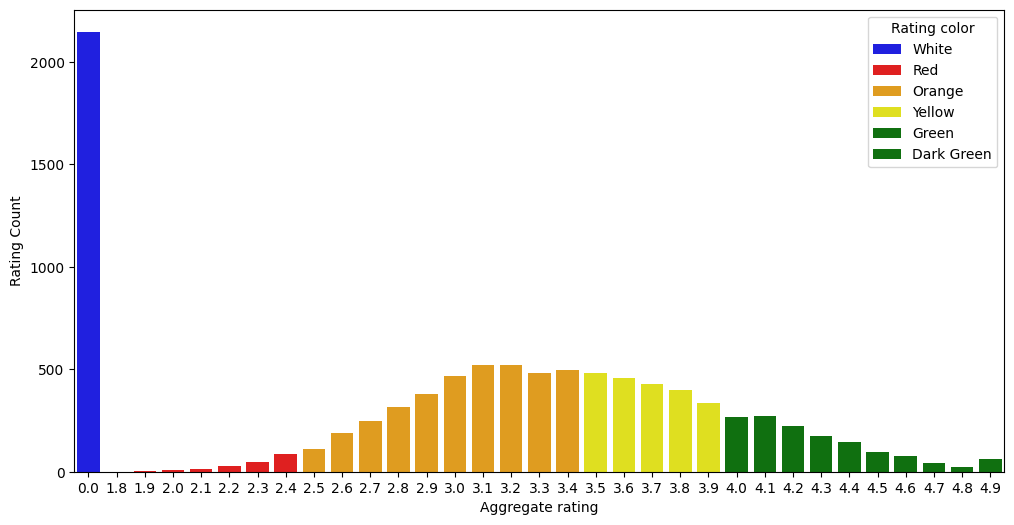

In [ ]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

##Observation:

Not Rated count is very high
Maximum number of rating are between 2.5 to 3.4

<ipython-input-32-4a93b8cf6afc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

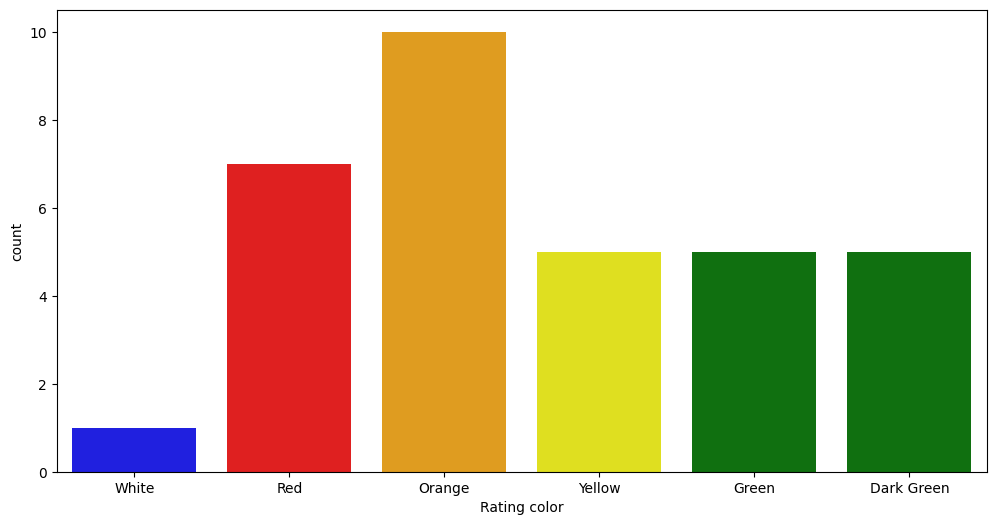

In [ ]:
## Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [ ]:
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [ ]:
### Find the countries name that has given 0 rating
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [ ]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

Aggregate rating         Country     0
0               0.0          Brazil     5
1               0.0           India  2139
2               0.0  United Kingdom     1
3               0.0   United States     3
4               1.8           India     1

In [ ]:
##Observations Maximum number of 0 ratings are from Indian customers

In [ ]:
##find out which currency is used by which country?
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(£)    80
14   United States               Dollar($)   434

In [ ]:
## Which Countries do have online deliveries option

In [ ]:
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [ ]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   434
15                 Yes           India  2423
16                 Yes             UAE    28

In [ ]:
# Observations:

# Online Deliveries are available in India and UAE

In [ ]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
## Create a pie chart for top 5 cities distribution

In [ ]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [ ]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7b4084c3b0d0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

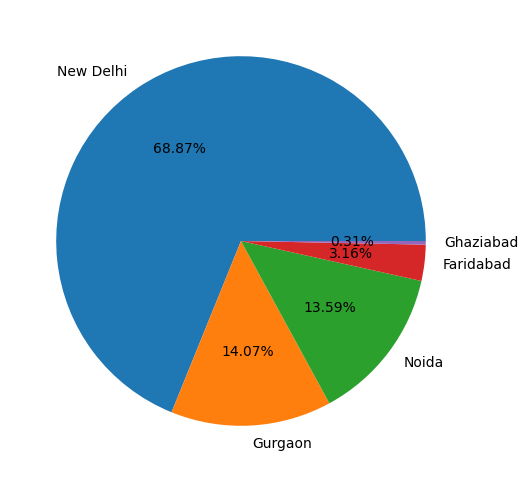

In [ ]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

In [ ]:
# prompt: Find the top 10 cuisines




UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

##Live Day 2-Live Session On EDA And Feature Engineering- Black Friday Dataset

##Black Friday Dataset EDA And Feature Engineering
##Cleaning and preparing the data for model training

In [ ]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [ ]:
#importing the dataset
df_train=pd.read_csv('train.csv')
df_train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17        10.0             A   
1  1000001  P00248942      F  0-17        10.0             A   
2  1000001  P00087842      F  0-17        10.0             A   
3  1000001  P00085442      F  0-17        10.0             A   
4  1000002  P00285442      M   55+        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
##  import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000004  P00128942      M  46-50           7             B   
1  1000009  P00113442      M  26-35          17             C   
2  1000010  P00288442      F  36-45           1             B   
3  1000010  P00145342      F  36-45           1             B   
4  1000011  P00053842      F  26-35           1             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               1                   1   
1                          0               0                   3   
2                         4+               1                   5   
3                         4+               1                   4   
4                          1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                 NaN  
1                 5.0                 NaN  
2                14.0                 NaN  
3                 9.0                 NaN  
4                 5.0                12.0

In [ ]:
##MErge both train and test data
df=df_train.append(df_test)
df.head()

<ipython-input-6-5ce5fefa6a62>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17        10.0             A   
1  1000001  P00248942      F  0-17        10.0             A   
2  1000001  P00087842      F  0-17        10.0             A   
3  1000001  P00085442      F  0-17        10.0             A   
4  1000002  P00285442      M   55+        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
##Basic
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301359 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     301359 non-null  int64  
 1   Product_ID                  301358 non-null  object 
 2   Gender                      301358 non-null  object 
 3   Age                         301358 non-null  object 
 4   Occupation                  301358 non-null  float64
 5   City_Category               301358 non-null  object 
 6   Stay_In_Current_City_Years  301358 non-null  object 
 7   Marital_Status              301358 non-null  float64
 8   Product_Category_1          301358 non-null  float64
 9   Product_Category_2          207778 non-null  float64
 10  Product_Category_3          91650 non-null   float64
 11  Purchase                    67759 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 29.9+ MB


In [ ]:

df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  3.013590e+05  301358.000000   301358.000000       301358.000000   
mean   1.002948e+06       8.100047        0.408627            5.281609   
std    2.499573e+03       6.524201        0.491581            3.735188   
min    1.000000e+01       0.000000        0.000000            1.000000   
25%    1.001465e+06       2.000000        0.000000            1.000000   
50%    1.002972e+06       7.000000        0.000000            5.000000   
75%    1.004344e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           18.000000   

       Product_Category_2  Product_Category_3      Purchase  
count       207778.000000        91650.000000  67759.000000  
mean             9.855206           12.678462   9295.979899  
std              5.090793            4.122175   4962.435754  
min              2.000000            3.000000    185.000000  
25%              5.000000            9.000000   5865.000000  
50%              9.000000           14.000000   8052.000000  
75%             15.000000           16.000000  12044.000000  
max             18.000000           18.000000  23958.000000

In [ ]:
df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
df.head()

Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17        10.0             A   
1  P00248942      F  0-17        10.0             A   
2  P00087842      F  0-17        10.0             A   
3  P00085442      F  0-17        10.0             A   
4  P00285442      M   55+        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [ ]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

Product_ID  Gender   Age  Occupation City_Category  \
0  P00069042     NaN  0-17        10.0             A   
1  P00248942     NaN  0-17        10.0             A   
2  P00087842     NaN  0-17        10.0             A   
3  P00085442     NaN  0-17        10.0             A   
4  P00285442     NaN   55+        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [ ]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
##second technqiue
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1, 7])

In [ ]:
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042     NaN    0        10.0             A   
1  P00248942     NaN    0        10.0             A   
2  P00087842     NaN    0        10.0             A   
3  P00085442     NaN    0        10.0             A   
4  P00285442     NaN    6        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN    1057.0  
4                 NaN                 NaN    7969.0

In [ ]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
df_city.head()

B  C
0  0  0
1  0  0
2  0  0
3  0  0
4  0  1

In [ ]:
df=pd.concat([df,df_city],axis=1)
df.head()

Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042     NaN    0        10.0             A   
1  P00248942     NaN    0        10.0             A   
2  P00087842     NaN    0        10.0             A   
3  P00085442     NaN    0        10.0             A   
4  P00285442     NaN    6        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2             0.0                 3.0   
1                          2             0.0                 1.0   
2                          2             0.0                12.0   
3                          2             0.0                12.0   
4                         4+             0.0                 8.0   

   Product_Category_2  Product_Category_3  Purchase  B  C  
0                 NaN                 NaN    8370.0  0  0  
1                 6.0                14.0   15200.0  0  0  
2                 NaN                 NaN    1422.0  0  0  
3                14.0                 NaN    1057.0  0  0  
4                 NaN                 NaN    7969.0  0  1

In [ ]:
df_city.head()

In [1]:
df=pd.concat([df,df_city],axis=1)
df.head()

NameError: name 'pd' is not defined

In [ ]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
## Missing Values
df.isnull().sum()

In [ ]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

In [ ]:
df['Product_Category_2'].value_counts()

In [ ]:
df['Product_Category_2'].mode()[0]

In [ ]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df['Product_Category_2'].isnull().sum()

In [ ]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

In [ ]:
df['Product_Category_3'].value_counts()

In [ ]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df['Stay_In_Current_City_Years'].unique()

In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
df.head()

In [ ]:
df.info()

In [2]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

NameError: name 'df' is not defined

In [ ]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [ ]:
df.info()

In [ ]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

##Purchasing of men is high then women

In [ ]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

In [ ]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

In [ ]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

In [ ]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [3]:
df.head()

NameError: name 'df' is not defined

In [4]:
##Feature Scaling
df_test=df[df['Purchase'].isnull()]

NameError: name 'df' is not defined

In [ ]:
df_train=df[~df['Purchase'].isnull()]

In [ ]:
X=df_train.drop('Purchase',axis=1)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
y=df_train['Purchase']

In [ ]:
y.shape

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [ ]:
## feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
## train ur model

##Live Day 3-Live Session On EDA And Feature Engineering- Flight Price Prediction Dataset

In [1]:
 ## Dataset: https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction

In [2]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()


Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [6]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [7]:
final_df=train_df.append(test_df)
final_df.head()

<ipython-input-7-0033d233a803>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [8]:
final_df.tail()

Airline Date_of_Journey   Source Destination            Route  \
2666          Air India       6/06/2019  Kolkata    Banglore  CCU → DEL → BLR   
2667             IndiGo      27/03/2019  Kolkata    Banglore        CCU → BLR   
2668        Jet Airways       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2669          Air India       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2670  Multiple carriers      15/06/2019    Delhi      Cochin  DEL → BOM → COK   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
2666    20:30  20:25 07 Jun  23h 55m      1 stop         No info    NaN  
2667    14:20         16:55   2h 35m    non-stop         No info    NaN  
2668    21:50  04:25 07 Mar   6h 35m      1 stop         No info    NaN  
2669    04:00         19:15  15h 15m      1 stop         No info    NaN  
2670    04:55         19:15  14h 20m      1 stop         No info    NaN

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
final_df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [11]:
##Fetaure Engineering Process
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [14]:
final_df.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info   Price Date  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  3897.0   24   
1    05:50         13:15   7h 25m     2 stops         No info  7662.0    1   

  Month  Year  
0    03  2019  
1    05  2019

In [15]:
df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

NameError: name 'df' is not defined

In [16]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 1.5+ MB


In [18]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
final_df.head(10)

Airline    Source Destination                  Route Dep_Time  \
0             IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1          Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2        Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3             IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4             IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
5           SpiceJet   Kolkata    Banglore              CCU → BLR    09:00   
6        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    18:55   
7        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:00   
8        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL    08:55   
9  Multiple carriers     Delhi      Cochin        DEL → BOM → COK    11:25   

   Arrival_Time Duration Total_Stops              Additional_Info    Price  \
0  01:10 22 Mar   2h 50m    non-stop                      No info   3897.0   
1         13:15   7h 25m     2 stops                      No info   7662.0   
2  04:25 10 Jun      19h     2 stops                      No info  13882.0   
3         23:30   5h 25m      1 stop                      No info   6218.0   
4         21:35   4h 45m      1 stop                      No info  13302.0   
5         11:25   2h 25m    non-stop                      No info   3873.0   
6  10:25 13 Mar  15h 30m      1 stop  In-flight meal not included  11087.0   
7  05:05 02 Mar   21h 5m      1 stop                      No info  22270.0   
8  10:25 13 Mar  25h 30m      1 stop  In-flight meal not included  11087.0   
9         19:15   7h 50m      1 stop                      No info   8625.0   

   Date  Month  Year  
0    24      3  2019  
1     1      5  2019  
2     9      6  2019  
3    12      5  2019  
4     1      3  2019  
5    24      6  2019  
6    12      3  2019  
7     1      3  2019  
8    12      3  2019  
9    27      5  2019

In [20]:
final_df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [21]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [22]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [ ]:
final_df.head(1)

In [23]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [24]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [25]:
final_df.head(5)

Airline    Source Destination                  Route Dep_Time Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   4h 45m   

  Total_Stops Additional_Info    Price  Date  Month  Year  Arrival_hour  \
0    non-stop         No info   3897.0    24      3  2019             1   
1     2 stops         No info   7662.0     1      5  2019            13   
2     2 stops         No info  13882.0     9      6  2019             4   
3      1 stop         No info   6218.0    12      5  2019            23   
4      1 stop         No info  13302.0     1      3  2019            21   

   Arrival_min  
0           10  
1           15  
2           25  
3           30  
4           35

In [26]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace=True)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hour     13354 non-null  int64  
 12  Arrival_min      13354 non-null  int64  
 13  Dept_hour        13354 non-null  int64  
 14  Dept_min         13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [28]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [30]:
final_df[final_df['Total_Stops'].isnull()]

Airline Source Destination Route Duration  Total_Stops  \
9039  Air India  Delhi      Cochin   NaN  23h 40m          NaN   

     Additional_Info   Price  Date  Month  Year  Arrival_hour  Arrival_min  \
9039         No info  7480.0     6      5  2019             9           25   

      Dept_hour  Dept_min  
9039          9        45

In [31]:
final_df.drop('Route',axis=1,inplace=True)

In [32]:
final_df.head()


Airline    Source Destination Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi   2h 50m          0.0         No info   
1    Air India   Kolkata    Banglore   7h 25m          2.0         No info   
2  Jet Airways     Delhi      Cochin      19h          2.0         No info   
3       IndiGo   Kolkata    Banglore   5h 25m          1.0         No info   
4       IndiGo  Banglore   New Delhi   4h 45m          1.0         No info   

     Price  Date  Month  Year  Arrival_hour  Arrival_min  Dept_hour  Dept_min  
0   3897.0    24      3  2019             1           10         22        20  
1   7662.0     1      5  2019            13           15          5        50  
2  13882.0     9      6  2019             4           25          9        25  
3   6218.0    12      5  2019            23           30         18         5  
4  13302.0     1      3  2019            21           35         16        50

In [33]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int64  
 8   Month            13354 non-null  int64  
 9   Year             13354 non-null  int64  
 10  Arrival_hour     13354 non-null  int64  
 11  Arrival_min      13354 non-null  int64  
 12  Dept_hour        13354 non-null  int64  
 13  Dept_min         13354 non-null  int64  
 14  duration_hour    13354 non-null  object 
dtypes: float64(2), int64(7), object(6)
memory usage: 1.6+ MB


In [34]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [36]:
final_df[final_df['duration_hour']=='5m']

Airline  Source Destination Duration  Total_Stops Additional_Info  \
6474  Air India  Mumbai   Hyderabad       5m          2.0         No info   
2660  Air India  Mumbai   Hyderabad       5m          2.0         No info   

        Price  Date  Month  Year  Arrival_hour  Arrival_min  Dept_hour  \
6474  17327.0     6      3  2019            16           55         16   
2660      NaN    12      3  2019            16           55         16   

      Dept_min duration_hour  
6474        50            5m  
2660        50            5m

In [37]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [38]:
final_df['duration_hour']=final_df['duration_hour'].astype('int')

In [39]:
final_df.drop('Duration',axis=1,inplace=True)

In [40]:
final_df.head(1)

Airline    Source Destination  Total_Stops Additional_Info   Price  Date  \
0  IndiGo  Banglore   New Delhi          0.0         No info  3897.0    24   

   Month  Year  Arrival_hour  Arrival_min  Dept_hour  Dept_min  duration_hour  
0      3  2019             1           10         22        20              2

In [41]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [44]:
final_df.shape

(13351, 14)

In [45]:
final_df.head(2)

Airline    Source Destination  Total_Stops Additional_Info   Price  Date  \
0     IndiGo  Banglore   New Delhi          0.0         No info  3897.0    24   
1  Air India   Kolkata    Banglore          2.0         No info  7662.0     1   

   Month  Year  Arrival_hour  Arrival_min  Dept_hour  Dept_min  duration_hour  
0      3  2019             1           10         22        20              2  
1      5  2019            13           15          5        50              7

In [46]:
final_df[['Airline']]

Airline
0                IndiGo
1             Air India
2           Jet Airways
3                IndiGo
4                IndiGo
...                 ...
2666          Air India
2667             IndiGo
2668        Jet Airways
2669          Air India
2670  Multiple carriers

[13351 rows x 1 columns]

In [47]:
ohe.fit_transform(np.array(final_df['Airline']).reshape(-1,1))

NameError: name 'ohe' is not defined

In [48]:
final_df.head()

Airline    Source Destination  Total_Stops Additional_Info    Price  \
0       IndiGo  Banglore   New Delhi          0.0         No info   3897.0   
1    Air India   Kolkata    Banglore          2.0         No info   7662.0   
2  Jet Airways     Delhi      Cochin          2.0         No info  13882.0   
3       IndiGo   Kolkata    Banglore          1.0         No info   6218.0   
4       IndiGo  Banglore   New Delhi          1.0         No info  13302.0   

   Date  Month  Year  Arrival_hour  Arrival_min  Dept_hour  Dept_min  \
0    24      3  2019             1           10         22        20   
1     1      5  2019            13           15          5        50   
2     9      6  2019             4           25          9        25   
3    12      5  2019            23           30         18         5   
4     1      3  2019            21           35         16        50   

   duration_hour  
0              2  
1              7  
2             19  
3              5  
4              4

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dept_hour        13351 non-null  int64  
 12  Dept_min         13351 non-null  int64  
 13  duration_hour    13351 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [50]:
pd.get_dummies(final_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

Total_Stops Additional_Info    Price  Date  Month  Year  Arrival_hour  \
0             0.0         No info   3897.0    24      3  2019             1   
1             2.0         No info   7662.0     1      5  2019            13   
2             2.0         No info  13882.0     9      6  2019             4   
3             1.0         No info   6218.0    12      5  2019            23   
4             1.0         No info  13302.0     1      3  2019            21   
...           ...             ...      ...   ...    ...   ...           ...   
2666          1.0         No info      NaN     6      6  2019            20   
2667          0.0         No info      NaN    27      3  2019            16   
2668          1.0         No info      NaN     6      3  2019             4   
2669          1.0         No info      NaN     6      3  2019            19   
2670          1.0         No info      NaN    15      6  2019            19   

      Arrival_min  Dept_hour  Dept_min  ...  Airline_Vistara Premium economy  \
0              10         22        20  ...                                0   
1              15          5        50  ...                                0   
2              25          9        25  ...                                0   
3              30         18         5  ...                                0   
4              35         16        50  ...                                0   
...           ...        ...       ...  ...                              ...   
2666           25         20        30  ...                                0   
2667           55         14        20  ...                                0   
2668           25         21        50  ...                                0   
2669           15          4         0  ...                                0   
2670           15          4        55  ...                                0   

      Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0                  0             0               0              0   
1                  0             0               1              0   
2                  0             1               0              0   
3                  0             0               1              0   
4                  0             0               0              0   
...              ...           ...             ...            ...   
2666               0             0               1              0   
2667               0             0               1              0   
2668               0             1               0              0   
2669               0             1               0              0   
2670               0             1               0              0   

      Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                      0                  0                      0   
1                      0                  0                      0   
2                      1                  0                      0   
3                      0                  0                      0   
4                      0                  0                      0   
...                  ...                ...                    ...   
2666                   0                  0                      0   
2667                   0                  0                      0   
2668                   1                  0                      0   
2669                   1                  0                      0   
2670                   1                  0                      0   

      Destination_Kolkata  Destination_New Delhi  
0                       0                      1  
1                       0                      0  
2                       0                      0  
3                       0                      0  
4                       0                      1  
...                   ...                    ...  
2666                    0                      0  
2667              